## Final Project Submission

Student name: Luis Diego Vallejos

Student pace: self paced

Scheduled project review date/time: 06/21/2021

Instructor name: Jeff Herman

Blog post URL: https://diegovallejossalas.github.io/attrition_analyzing_and_modeling

### Introduction
For this project I am using the HR Analytics Case Study dataset that contains information of a fictitious company with around 4400 employees. This project brings an exhaustive exploration and analysis of the variables that can affect attrition and models to predict it. 

The data includes 5 datasets, the first one includes information about education, salaries, gender, marital status, years at company and more. The second and third datasets are surveys. One of them is about job satisfaction and the other one is the performance.The other two datasets are related to the days and hours that every employee worked in last year. 

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

# Obtaining and Scrubbing data

On this step we explore and understand the dataframes and also fix missing values issues.

In [2]:
Dictionary = pd.read_excel('data_dictionary.xlsx')
Dictionary.replace(to_replace=np.nan, value=' ', inplace=True)
Dictionary

,Variable,Meaning,Levels
0,Age,Age of the employee,
1,Attrition,Whether the employee left in the previous year...,
2,BusinessTravel,How frequently the employees travelled for bus...,
3,Department,Department in company,
4,DistanceFromHome,Distance from home in kms,
5,Education,Education Level,1 'Below College'
6,,,2 'College'
7,,,3 'Bachelor'
8,,,4 'Master'
9,,,5 'Doctor'


## General Data Frame

In [3]:
df = pd.read_csv("general_data.csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Looking at the missing data I decided to use the mode to replace the missing values because they will not make a significant difference compared to the next highest value, and we are dealing with integers.

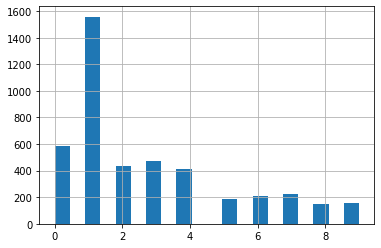

In [6]:
df['NumCompaniesWorked'].hist(bins = 20)

In [7]:
df['NumCompaniesWorked'].value_counts().head(5)

1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
Name: NumCompaniesWorked, dtype: int64

In [8]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(1.0)

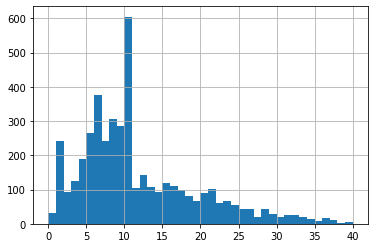

In [9]:
df['TotalWorkingYears'].hist(bins = 40)

In [10]:
df['TotalWorkingYears'].value_counts().head(1)

10.0    605
Name: TotalWorkingYears, dtype: int64

In [11]:
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(10.0)

In [12]:
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

## Employe survey dataframe

In [13]:
employee_survey = pd.read_csv("employee_survey_data.csv")
employee_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [14]:
print('Employee survey information')
print('\n')
print(employee_survey.info())
print('\n')
print('Employee survey missing values')
print('\n')
print(employee_survey.isna().sum())

Employee survey information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
EmployeeID                 4410 non-null int64
EnvironmentSatisfaction    4385 non-null float64
JobSatisfaction            4390 non-null float64
WorkLifeBalance            4372 non-null float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB
None


Employee survey missing values


EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64


#### Dealing with missing values

Plot histograms to decide how to solve missing values problem. 

Due to the nature of the data we need to replace missing values using the mode.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000284772F7288>,
      dtype=object)

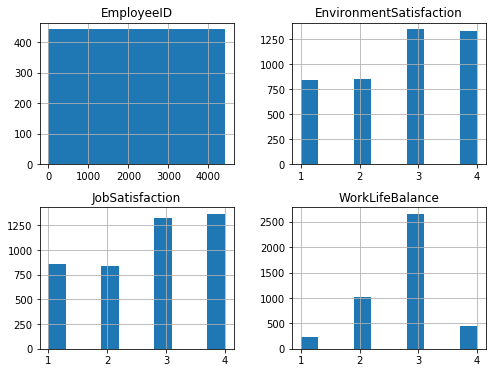

In [15]:
employee_survey.hist(figsize=(8,6))

In [16]:
print('Environment Satisfaction mean = ',employee_survey['EnvironmentSatisfaction'].mode())
print('Job Satisfaction mean = ',employee_survey['JobSatisfaction'].mode())
print('Work Life Balance mean = ',employee_survey['WorkLifeBalance'].mode())

Environment Satisfaction mean =  0    3.0
dtype: float64
Job Satisfaction mean =  0    4.0
dtype: float64
Work Life Balance mean =  0    3.0
dtype: float64


In [17]:
employee_survey['EnvironmentSatisfaction'] = employee_survey['EnvironmentSatisfaction'].fillna(3)
employee_survey['JobSatisfaction'] = employee_survey['JobSatisfaction'].fillna(4)
employee_survey['WorkLifeBalance'] = employee_survey['WorkLifeBalance'].fillna(3)
employee_survey.isna().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000284772F7C48>,
      dtype=object)

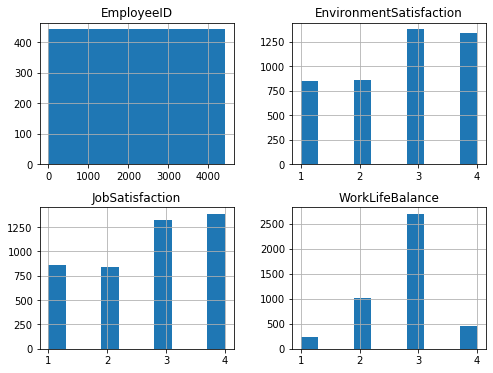

In [18]:
employee_survey.hist(figsize=(8,6))

## Manager survey dataframe

In [19]:
manager_survey = pd.read_csv("manager_survey_data.csv")
manager_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [20]:
print('Manager survey information')
print('\n')
print(manager_survey.info())
print('\n')
print('Manager survey missing values')
print('\n')
print(manager_survey.isna().sum())

Manager survey information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
EmployeeID           4410 non-null int64
JobInvolvement       4410 non-null int64
PerformanceRating    4410 non-null int64
dtypes: int64(3)
memory usage: 103.5 KB
None


Manager survey missing values


EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64


# Merging data

The first thing I am doing from this point is merging the datasets and then take a look of the distribution of every column to discard quickly what is not necessary.

In [21]:
df = pd.concat([df.set_index('EmployeeID'), employee_survey.set_index('EmployeeID'),manager_survey.set_index('EmployeeID')],
               axis=1, join='inner').reset_index()
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


# Exploring Data

Histograms gives us an idea about the distribution of the variables, thus we can discard those whose are just wasting memory.

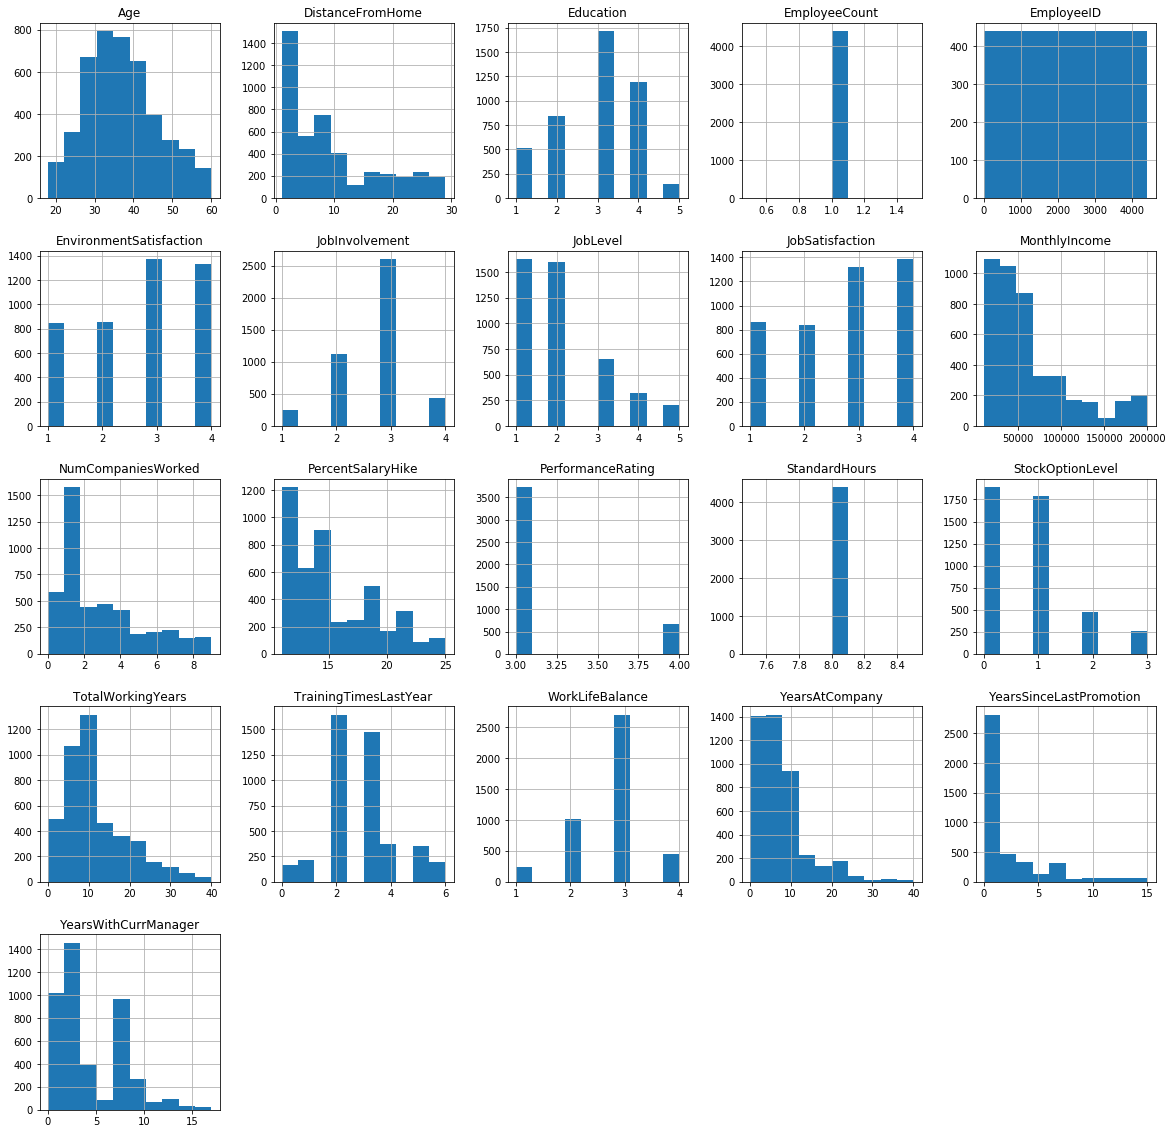

In [22]:
df.hist(figsize=(20,20))
plt.show()

## Functions

I am creating some functions to explore the variables and get some insights. I am also using different kinds of visualizations like bars, boxplots, violin plots, etc depending on each variable.

In some cases when my experience in Human Resources field tells me to explore deeper, I created visualizations combining some variables specially to explain how some correlations work. This is extremely useful for recommendations.

This function gives us a new data frame with the values of the column splitted by Attrition and adds the attrition percentage.

In [23]:
def dfmaker(col):
    dftw = df.groupby(col)['Attrition'].value_counts()
    No_Attrition = df[df['Attrition'] == 0][col].value_counts().sort_index()
    No_Attrition.rename('No_Attrition', inplace = True)
    Attrition = df[df['Attrition'] == 1][col].value_counts().sort_index()
    Attrition.rename('Attrition', inplace = True)
    masterdf = pd.concat([No_Attrition, Attrition], axis = 1)
    masterdf.fillna(0, inplace = True)
    masterdf.head()
    masterdf['Attrition %'] = (masterdf['Attrition'] / (masterdf['Attrition'] + masterdf['No_Attrition']) *100)
    return(masterdf)

The next function returns a visualization of the distribution of Attrition per value of one variable.

In [24]:
def vmaker(col):
    dftw = df.groupby(col)['Attrition'].value_counts()
    No_Attrition = df[df['Attrition'] == 0][col].value_counts().sort_index()
    No_Attrition.rename('No_Attrition', inplace = True)
    Attrition = df[df['Attrition'] == 1][col].value_counts().sort_index()
    Attrition.rename('Attrition', inplace = True)
    masterdf = pd.concat([No_Attrition, Attrition], axis = 1)
    masterdf.fillna(0, inplace = True)
    masterdf.head()
    masterdf['Attrition %'] = (masterdf['Attrition'] / (masterdf['Attrition'] + masterdf['No_Attrition']) *100)

    totals = [i+j for i,j in zip(masterdf['No_Attrition'], masterdf['Attrition'])]
    blueBars = [i / j * 100 for i,j in zip(masterdf['No_Attrition'], totals)]
    redBars = [i / j * 100 for i,j in zip(masterdf['Attrition'], totals)]
    plt.figure(figsize=(14,6))
    sns.set(style="whitegrid")
    names = masterdf.index
    plt.bar(range(len(masterdf)), blueBars, color="#34495e", width=0.8, label = 'No Attrition')
    plt.bar(range(len(masterdf)), redBars, bottom=blueBars, color="#e74c3c", width=0.8, 
           label = 'Attrition')
    plt.title(f'Comparing Attrition by {col}', fontsize=18)
    plt.xticks(range(len(masterdf)), names)
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

This next function returns a countplot

In [25]:
def hmaker(col):
    plt.figure(figsize=(14,6))
    sns.countplot(df[col])
    plt.title(f'Number of Employees per {col}', fontsize=18)
    plt.xticks(fontsize=10)
    plt.ylabel("Number of Employees",fontsize=14)
    plt.xlabel(col,fontsize=14)
    plt.show()

This next function returns a boxplot

In [26]:
def box(col):
    sns.boxplot(x='Attrition', y=col,
            hue='Attrition',
            data=df)

This next function helps us to visualize percentages when you want to cross two variables.

In [27]:
def crossmaker(col1,col2):
    plt.figure(figsize=(14,6))
    plt.title(f'Percentage of {col1} of Employees by {col2}', fontsize=18)
    ax = sns.heatmap(pd.crosstab(df[col1], df[col2], normalize = True),
            cmap="coolwarm", annot=True, cbar=False)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

### Exploring Attrition
Let's replace Attrition's values into numerical.

In [28]:
df['Attrition'] = df['Attrition'].replace(['Yes', 'No'], [1, 0])

Let's get some insights about attrition.
16% of employees leaved the company last year. This number could be tricky when you try to understand it because it may vary between different variables. 


It is part of the exploration to compare variables by attrition and we have to pay attention on those whose have an attrition percentage considerable upper or lower than 16.

In [29]:
print("Percentage of Attrition is:",(len(df[df['Attrition']==1])/len(df))*100,"%")

Percentage of Attrition is: 16.122448979591837 %


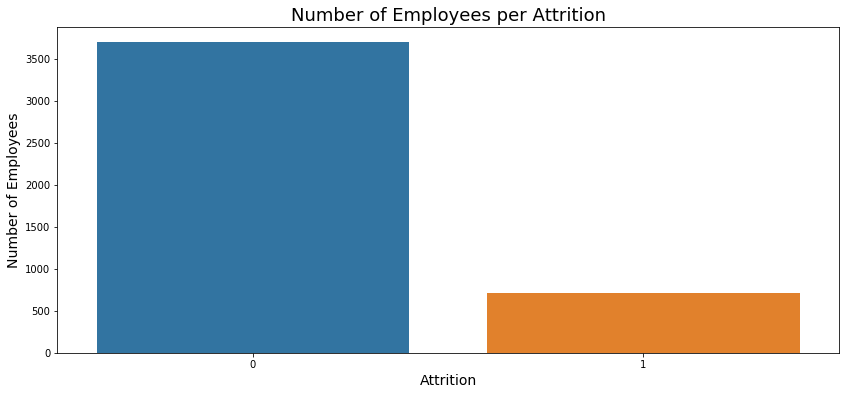

In [30]:
hmaker('Attrition')

### Exploring Performance Rating
We can see that perfomance rating was filled with just two values (3 and 4) and also the difference on % of attrition is not significant.
I can conclude that performance is not being evaluated seriously, it's almost impossible to have just 2 values in a range of 5. Thats why I am dropping this variable.

In [31]:
dfmaker('PerformanceRating')

,No_Attrition,Attrition,Attrition %
3,3144,588,15.755627
4,555,123,18.141593


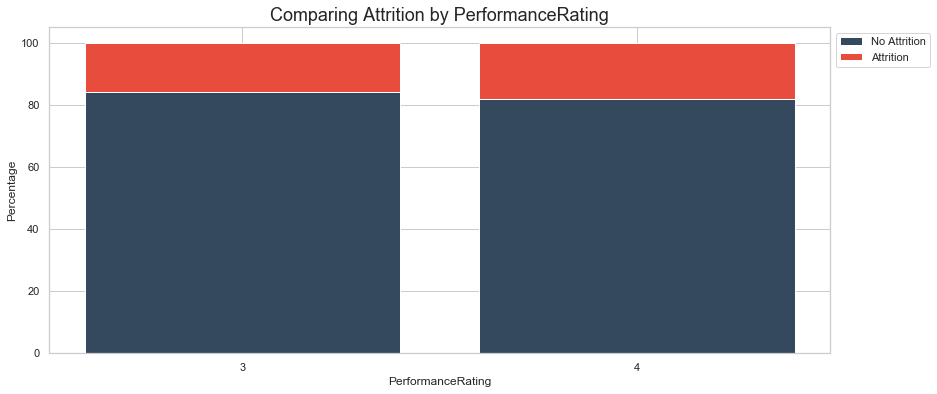

In [32]:
vmaker('PerformanceRating')

### Exploring Job Involvement

For this variable we can assume that those employees with low qualification tend to get fired and a higher attrition level is normal. When the punctuation is 4 and the attrition is high, we have a problem, we can assume that we are losing good employees.

In [33]:
dfmaker('JobInvolvement')

,No_Attrition,Attrition,Attrition %
1,195,54,21.686747
2,945,180,16.000000
3,2205,399,15.322581
4,354,78,18.055556


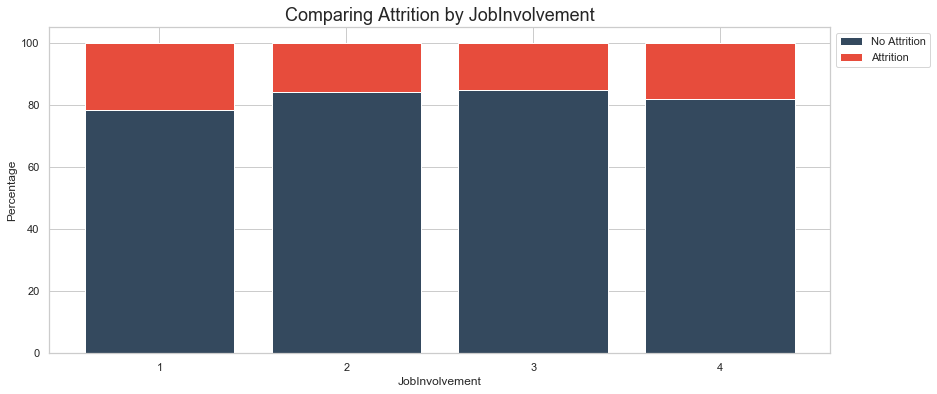

In [34]:
vmaker('JobInvolvement')

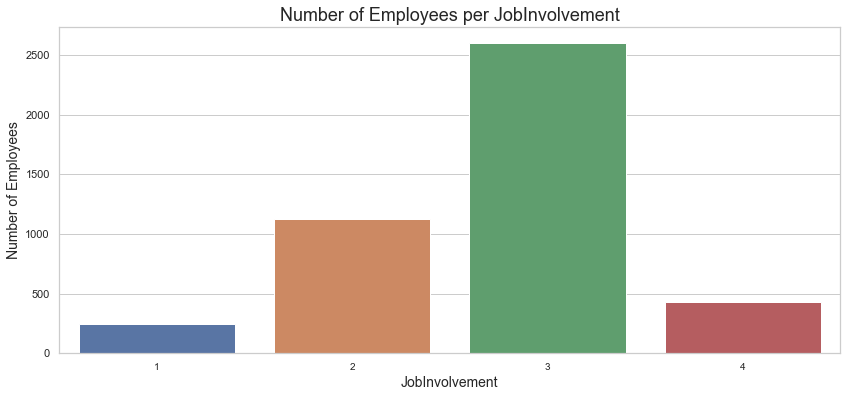

In [35]:
hmaker('JobInvolvement')

### Exploring Work Life Balance

This variable is interesting because attrition for employees who rated 1 is 31% and for other values is almost the half.

We need to pay attention on Research and Development department because the bulk of workers are in that area so, each percentage point causes a greater impact.

Why almost 18% of employees that rated 4 in this variable leaved the company?

In [36]:
dfmaker('WorkLifeBalance')

,No_Attrition,Attrition,Attrition %
1.0,164,75,31.380753
2.0,848,171,16.781158
3.0,2314,384,14.232765
4.0,373,81,17.841410


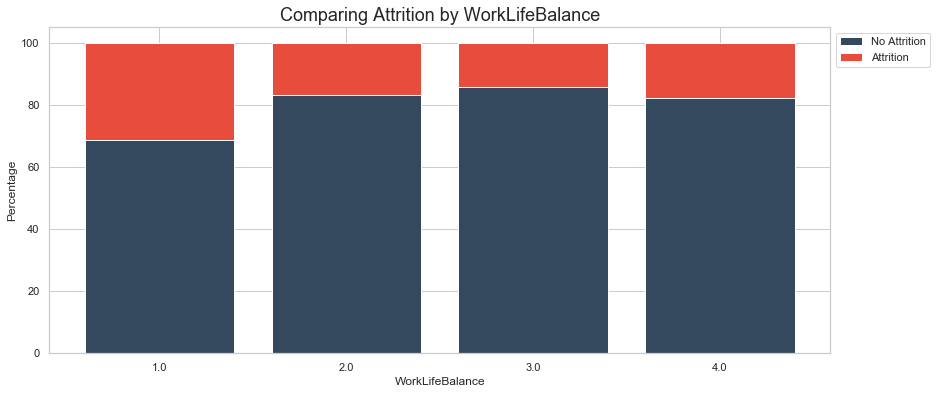

In [37]:
vmaker('WorkLifeBalance')

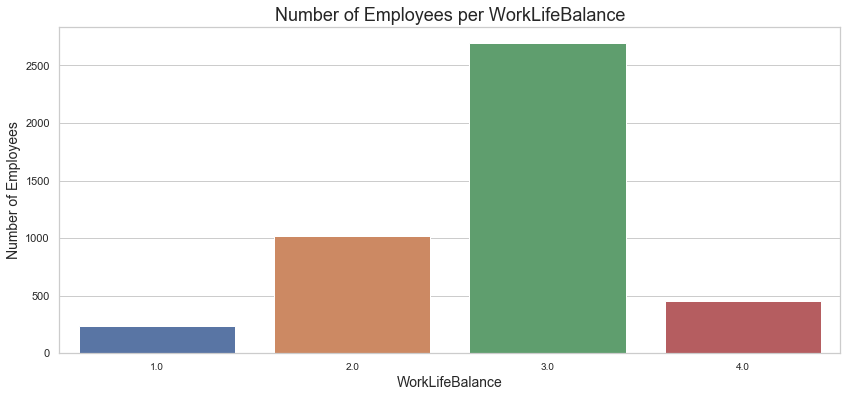

In [38]:
hmaker('WorkLifeBalance')

In [39]:
wlb = df.loc[df['WorkLifeBalance']==4]
wlb.head(2)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
1,2,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
15,16,37,0,Travel_Rarely,Research & Development,1,3,Life Sciences,1,Male,...,7.0,2,5,0,1,3.0,4.0,4.0,3,3


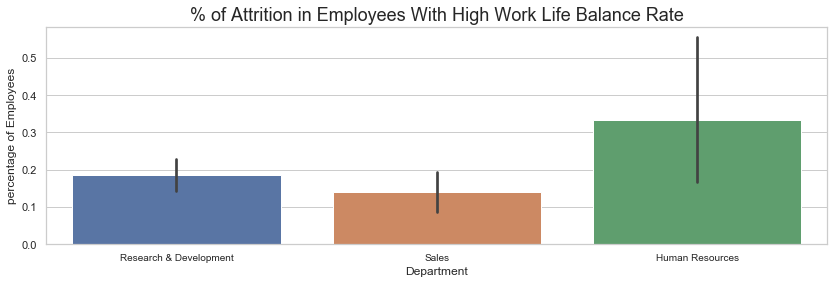

In [40]:
plt.figure(figsize=(14,4))
sns.barplot(x = 'Department', y = "Attrition", data=wlb)
plt.title('% of Attrition in Employees With High Work Life Balance Rate', fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel("percentage of Employees")
plt.show()

### Exploring Job Satisfaction

In [41]:
dfmaker('JobSatisfaction')

,No_Attrition,Attrition,Attrition %
1.0,663,197,22.906977
2.0,702,138,16.428571
3.0,1104,219,16.553288
4.0,1230,157,11.319394


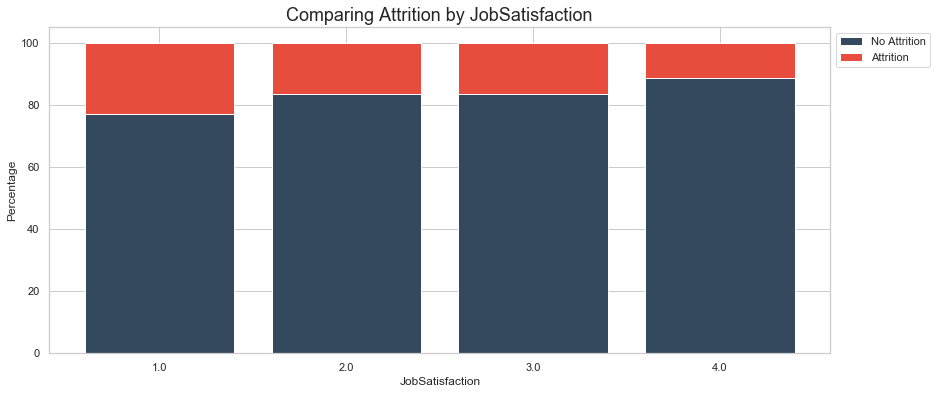

In [42]:
vmaker('JobSatisfaction')

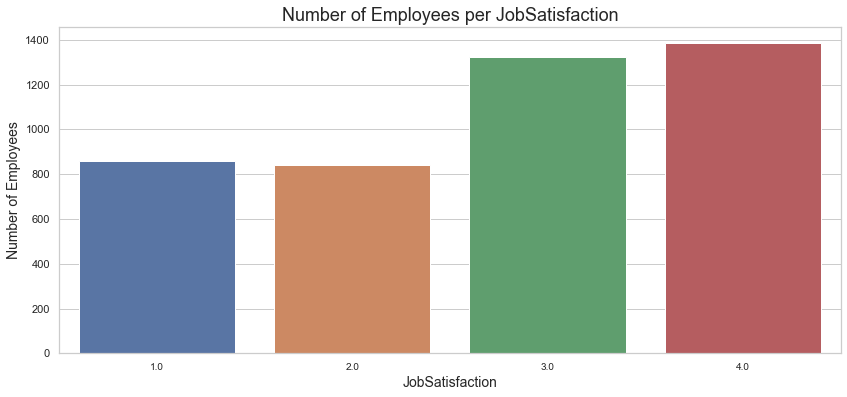

In [43]:
hmaker('JobSatisfaction')

In [44]:
js = df.loc[df['JobSatisfaction']==4]
js.head(2)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
3,4,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3


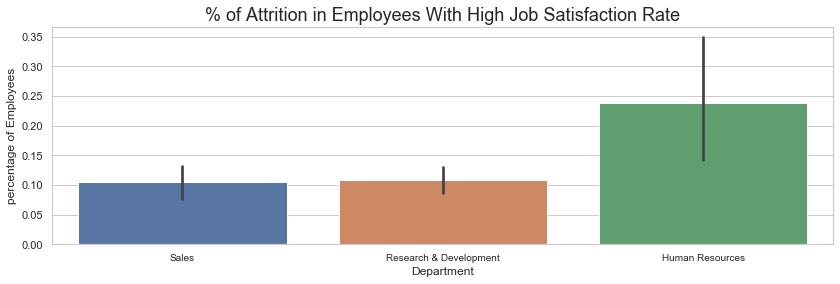

In [45]:
plt.figure(figsize=(14,4))
sns.barplot(x = 'Department', y = "Attrition", data=js)
plt.title('% of Attrition in Employees With High Job Satisfaction Rate', fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel("percentage of Employees")
plt.show()

### Exploring Enviroment Satisfaction
I could detect that around 30% of employees from Human Resources are leaving the company even when they think that they are working with a very high enviroment satisfaction

In [46]:
dfmaker('EnvironmentSatisfaction')

,No_Attrition,Attrition,Attrition %
1.0,632,213,25.207101
2.0,728,128,14.953271
3.0,1184,191,13.890909
4.0,1155,179,13.418291


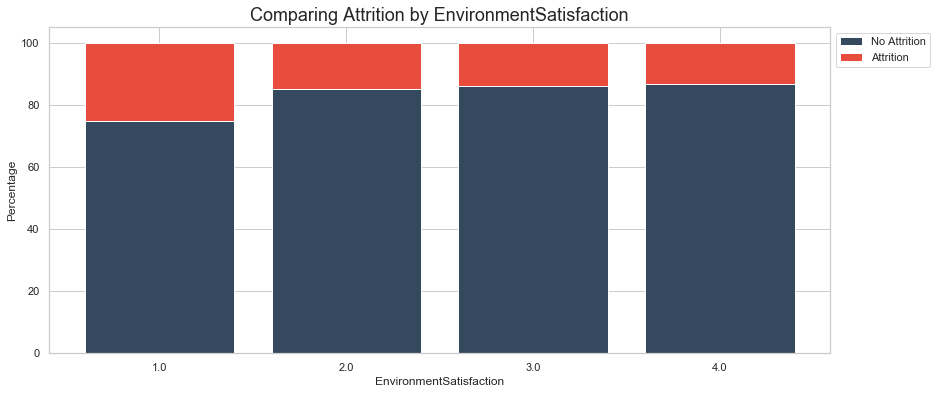

In [47]:
vmaker('EnvironmentSatisfaction')

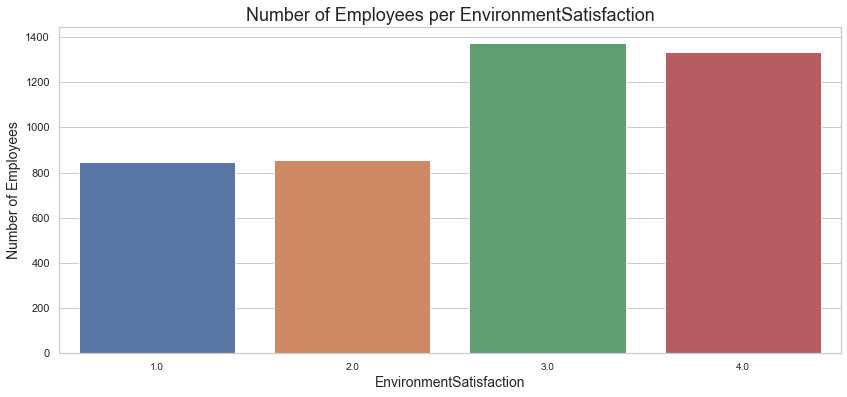

In [48]:
hmaker('EnvironmentSatisfaction')

In [49]:
es = df.loc[df['EnvironmentSatisfaction']==4]
es.head(2)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
3,4,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


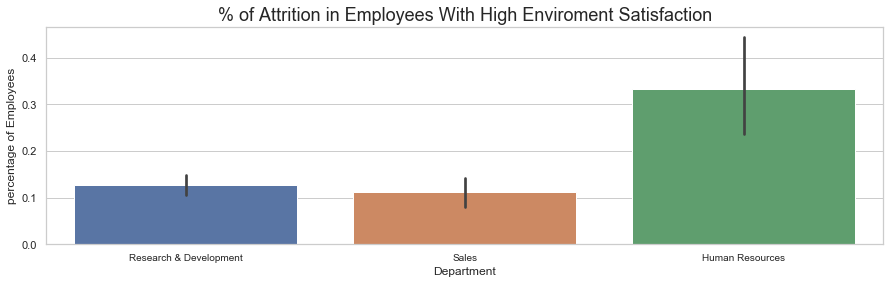

In [50]:
plt.figure(figsize=(15,4))
sns.barplot(x = 'Department', y = "Attrition", data=es)
plt.title('% of Attrition in Employees With High Enviroment Satisfaction', fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel("percentage of Employees")
plt.show()

### Crossing Surveys

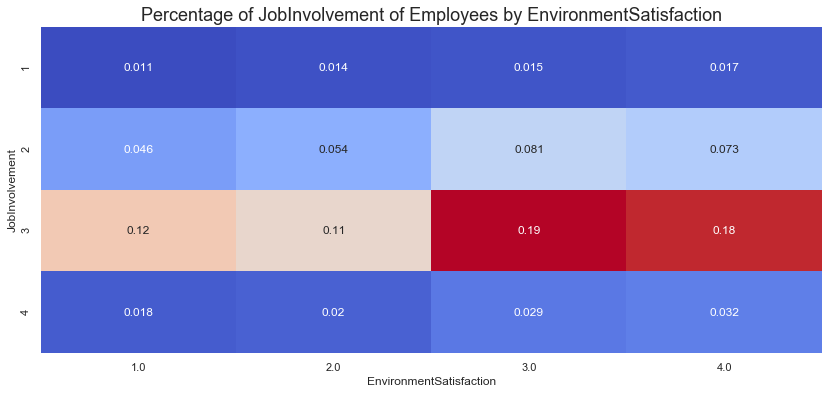

In [51]:
crossmaker('JobInvolvement', 'EnvironmentSatisfaction')

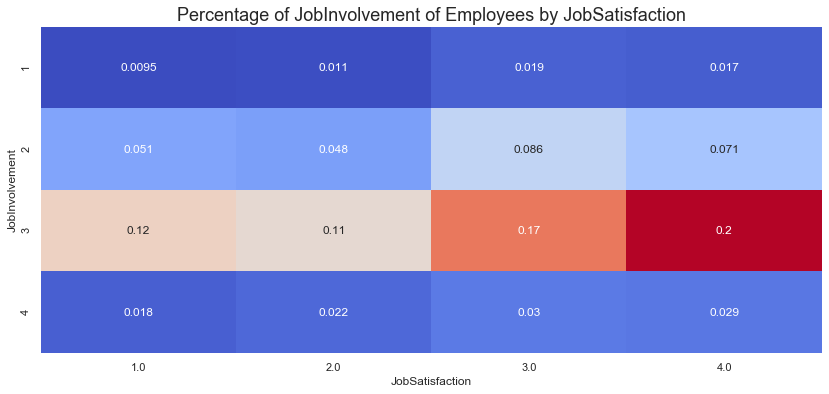

In [52]:
crossmaker('JobInvolvement', 'JobSatisfaction')

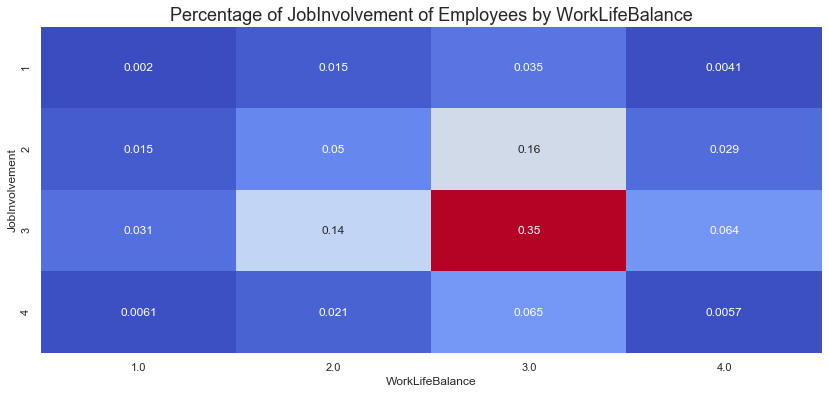

In [53]:
crossmaker('JobInvolvement', 'WorkLifeBalance')

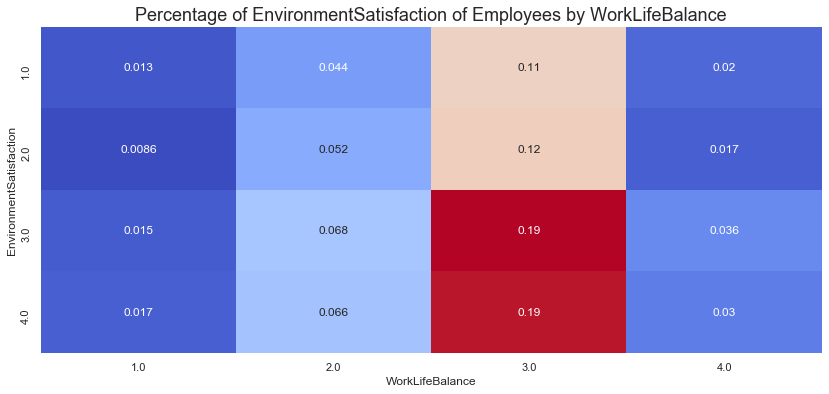

In [54]:
crossmaker('EnvironmentSatisfaction', 'WorkLifeBalance')

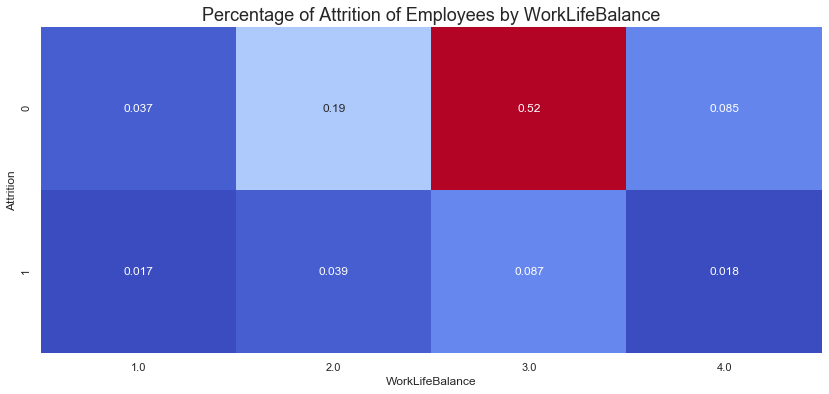

In [55]:
crossmaker('Attrition', 'WorkLifeBalance')

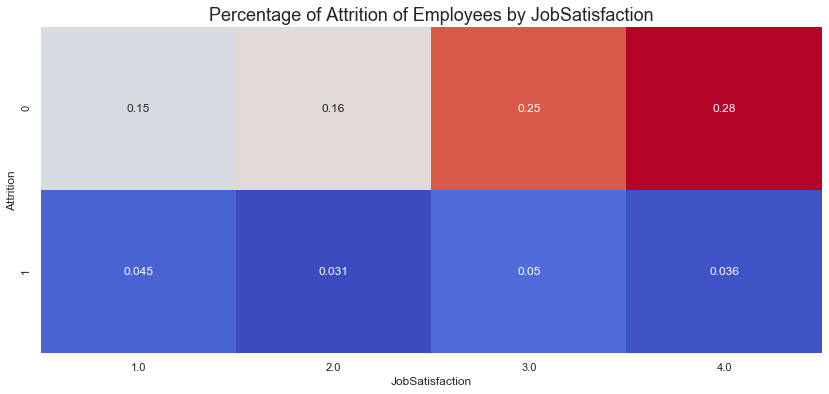

In [56]:
crossmaker('Attrition', 'JobSatisfaction')

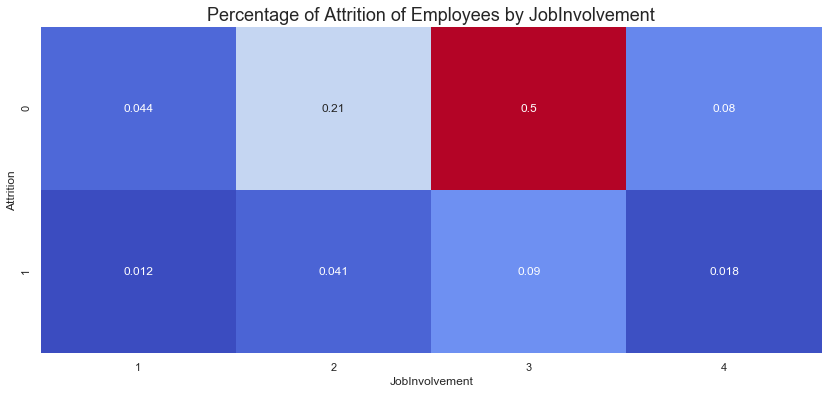

In [57]:
crossmaker('Attrition', 'JobInvolvement')

### Exploring Stock Option Level
It seems that there is not a significant difference of attrition between values ant they are pretty close to 16.

In [58]:
dfmaker('StockOptionLevel')

,No_Attrition,Attrition,Attrition %
0,1575,318,16.798732
1,1518,270,15.100671
2,390,84,17.721519
3,216,39,15.294118


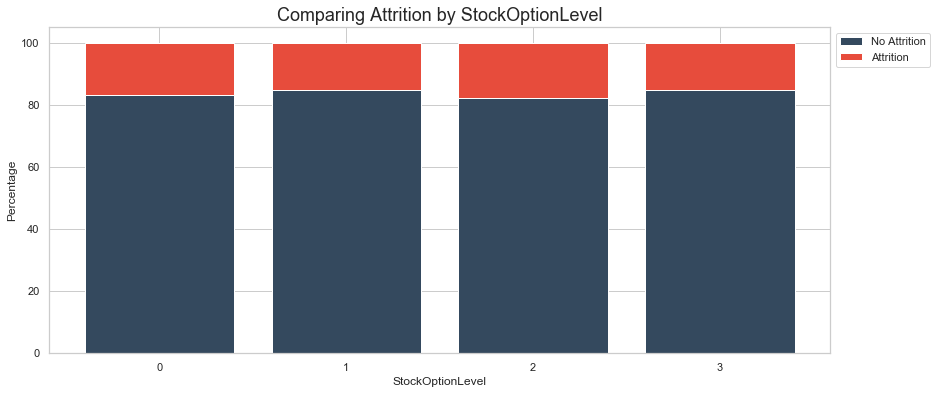

In [59]:
vmaker('StockOptionLevel')

### Exploring Training
We can see that the attrition decreases dramatically when the employee has 6 trainings. The result of our algorithms is going to tell us how important this feature is, but to me there is missing a key variable: 'kind of training', so we can figure out if the company provides internal and/or external trainings and the cost of this. 

It is very important to understand that attrition brings a cost to the company, and this cost on training has two faces:

1) We lost the cost of training of the employee who is leaving the company.

2) We invest on the training of the employee who is replacing the one who leaved the company.

In [60]:
dfmaker('TrainingTimesLastYear')

,No_Attrition,Attrition,Attrition %
0,132,30,18.518519
1,183,30,14.084507
2,1359,282,17.184644
3,1215,258,17.515275
4,321,48,13.008130
5,306,51,14.285714
6,183,12,6.153846


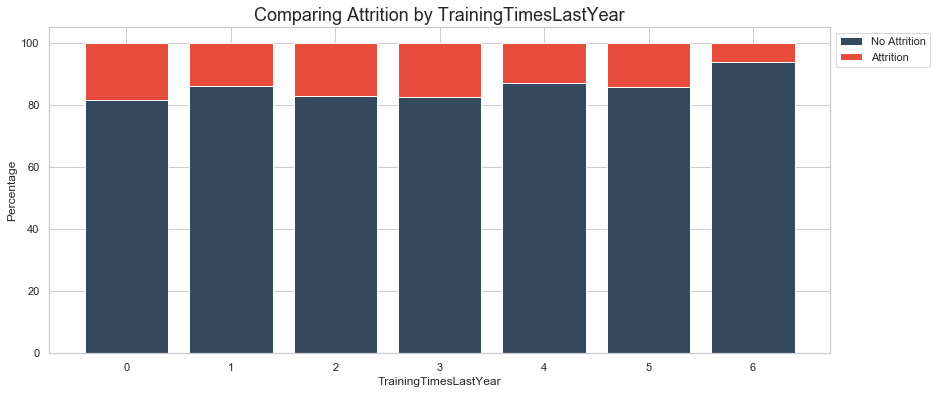

In [61]:
vmaker('TrainingTimesLastYear')

In [62]:
ttly = df.loc[df['TrainingTimesLastYear'] == 6]
ttly.head(2)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
31,32,28,0,Travel_Rarely,Research & Development,7,3,Other,1,Male,...,5.0,6,5,0,2,4.0,4.0,3.0,2,3


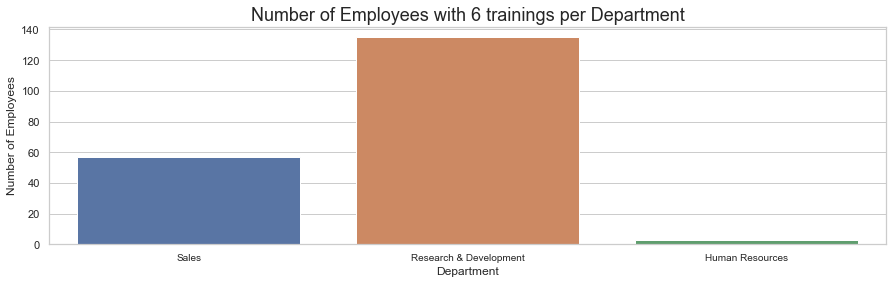

In [63]:
plt.figure(figsize=(15,4))
sns.countplot(ttly['Department'])
plt.title('Number of Employees with 6 trainings per Department', fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel("Number of Employees")
plt.show()

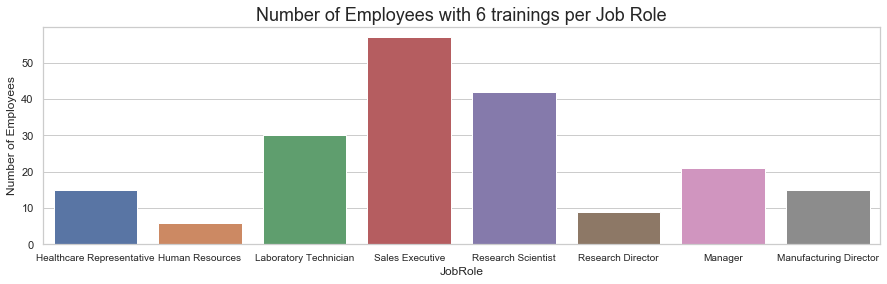

In [64]:
plt.figure(figsize=(15,4))
sns.countplot(ttly['JobRole'])
plt.title('Number of Employees with 6 trainings per Job Role', fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel("Number of Employees")
plt.show()

### Exploring Number of Companies Worked
Employes with 2 and more than 5 previous jobs have around 100% more chances to leave the company than employes with less than 5 jobs.

The bulk of the company's workers have 1 previous job. we have a red flag.

In [65]:
dfmaker('NumCompaniesWorked')

,No_Attrition,Attrition,Attrition %
0.0,517,69,11.774744
1.0,1280,297,18.833228
2.0,390,48,10.958904
3.0,426,48,10.126582
4.0,365,50,12.048193
5.0,141,46,24.598930
6.0,160,48,23.076923
7.0,171,51,22.972973
8.0,129,18,12.244898
9.0,120,36,23.076923


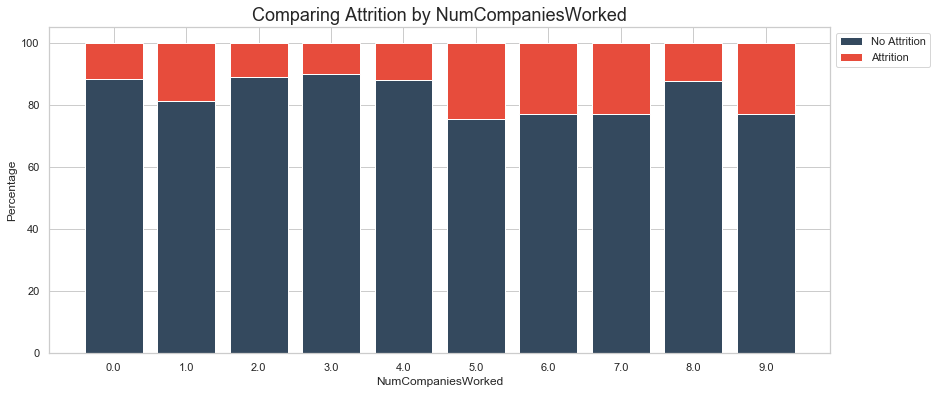

In [66]:
vmaker('NumCompaniesWorked')

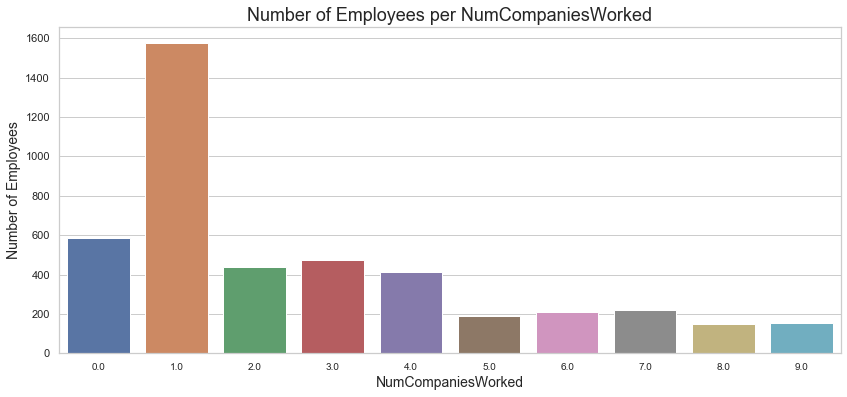

In [67]:
hmaker('NumCompaniesWorked')

### Exploring Total Working Years

In [68]:
dfmaker('TotalWorkingYears')

,No_Attrition,Attrition,Attrition %
0.0,18.0,15.0,45.454545
1.0,123.0,119.0,49.173554
2.0,66.0,27.0,29.032258
3.0,99.0,27.0,21.428571
4.0,153.0,36.0,19.047619
5.0,216.0,48.0,18.181818
6.0,309.0,66.0,17.600000
7.0,189.0,54.0,22.222222
8.0,260.0,47.0,15.309446
9.0,257.0,30.0,10.452962


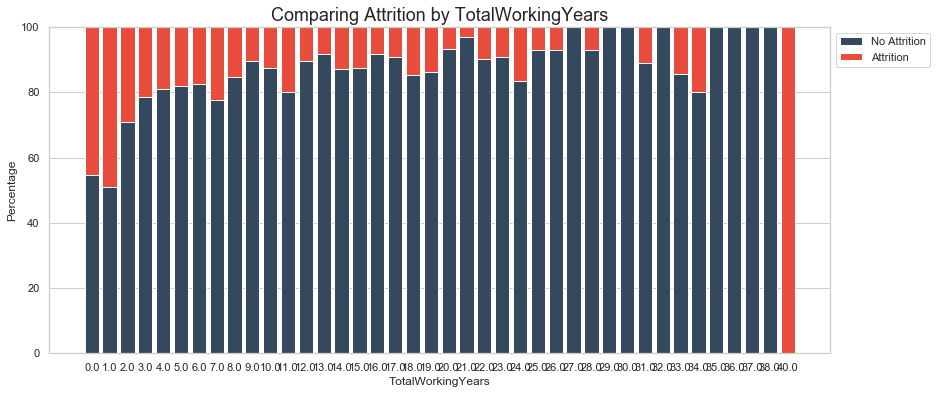

In [69]:
vmaker('TotalWorkingYears')

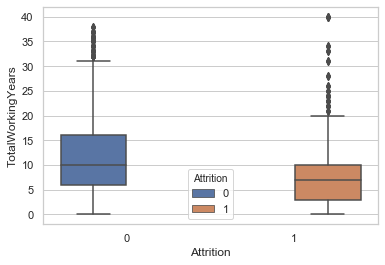

In [70]:
box('TotalWorkingYears')

### Exploring Years At Company

In [71]:
dfmaker('YearsAtCompany')

,No_Attrition,Attrition,Attrition %
0,84.0,48.0,36.363636
1,336.0,177.0,34.502924
2,300.0,81.0,21.259843
3,324.0,60.0,15.625000
4,273.0,57.0,17.272727
5,525.0,63.0,10.714286
6,201.0,27.0,11.842105
7,237.0,33.0,12.222222
8,213.0,27.0,11.250000
9,222.0,24.0,9.756098


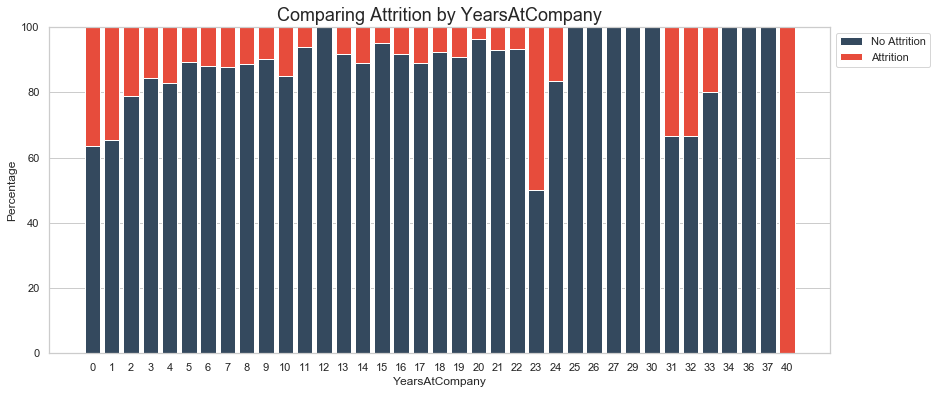

In [72]:
vmaker('YearsAtCompany')

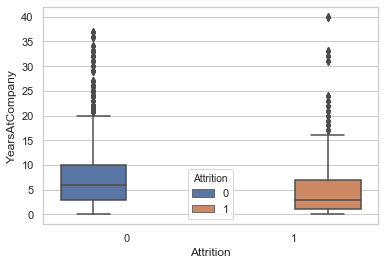

In [73]:
box('YearsAtCompany')

### Exploring Years With Current Manager

It seems like the first year with a new manager is critical for attrition. Around 30% of those employees leave the company.
That makes us think about the impact in employee’s attrition when a manager leaves the company.


In [74]:
dfmaker('YearsWithCurrManager')

,No_Attrition,Attrition,Attrition %
0,534,255.0,32.319392
1,195,33.0,14.473684
2,882,150.0,14.534884
3,369,57.0,13.380282
4,261,33.0,11.224490
5,81,12.0,12.903226
6,75,12.0,13.793103
7,555,93.0,14.351852
8,291,30.0,9.345794
9,174,18.0,9.375000


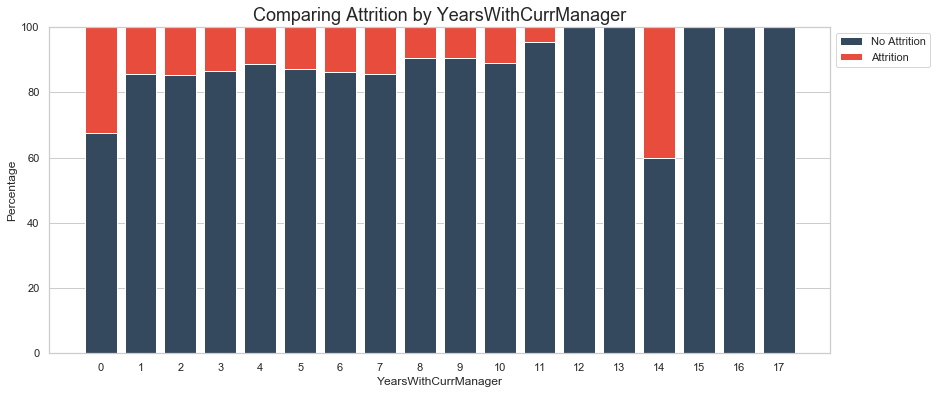

In [75]:
vmaker('YearsWithCurrManager')

### Exploring Percent Salary Hike

In [76]:
dfmaker('PercentSalaryHike')

,No_Attrition,Attrition,Attrition %
11,540,90,14.285714
12,504,90,15.151515
13,525,102,16.267943
14,516,87,14.427861
15,240,63,20.792079
16,204,30,12.820513
17,201,45,18.292683
18,228,39,14.606742
19,186,42,18.421053
20,138,27,16.363636


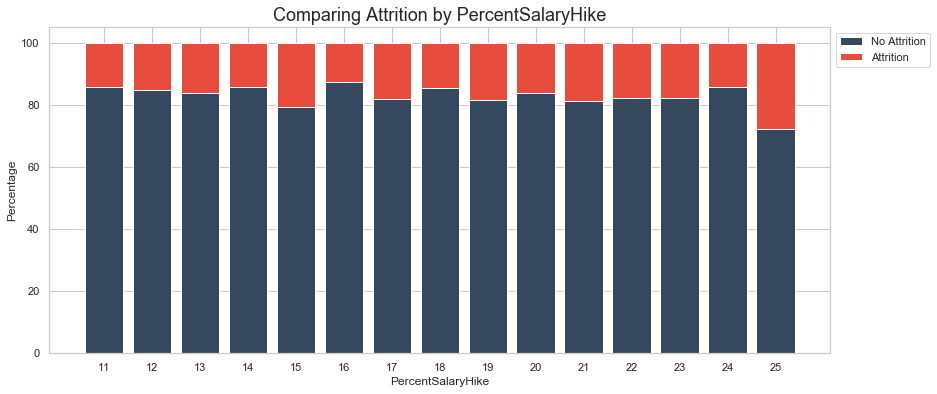

In [77]:
vmaker('PercentSalaryHike')

### Exploring Distance From Home

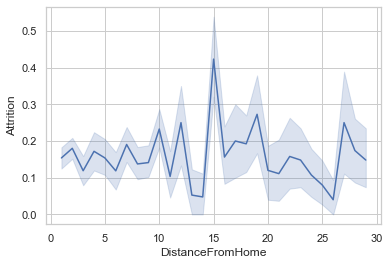

In [78]:
sns.lineplot(x='DistanceFromHome', y='Attrition', data = df,) 

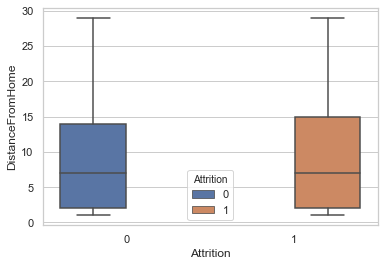

In [79]:
box('DistanceFromHome')

### Exploring Years Since Last Promotion

In [80]:
dfmaker('YearsSinceLastPromotion')

,No_Attrition,Attrition,Attrition %
0,1413,330.0,18.932874
1,924,147.0,13.725490
2,396,81.0,16.981132
3,129,27.0,17.307692
4,168,15.0,8.196721
5,129,6.0,4.444444
6,78,18.0,18.750000
7,180,48.0,21.052632
8,54,0.0,0.000000
9,39,12.0,23.529412


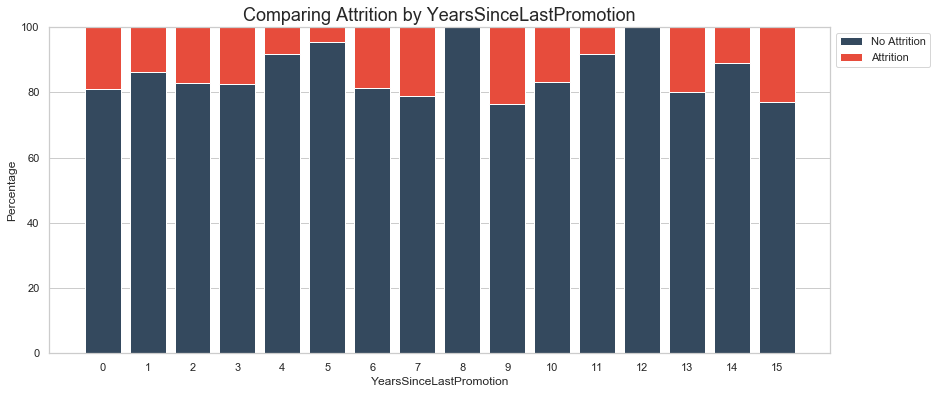

In [81]:
vmaker('YearsSinceLastPromotion')

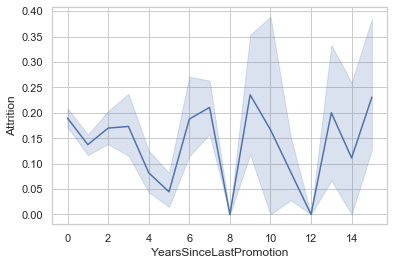

In [82]:
sns.lineplot(x='YearsSinceLastPromotion', y='Attrition', data = df) 

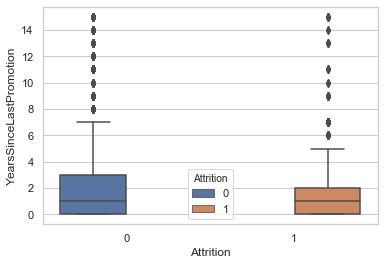

In [83]:
box('YearsSinceLastPromotion')

### Exploring Age

To get a better sense about how age can affect attrition I decided to add a column that divides ages by groups. The employees in the range of 18 and 20 years old have almost 60% chances to leave the company. Those who are in the 21 - 25 range have 29% and those in the 26 - 30 range 21%.
We can say that our target should be from 30 years old.

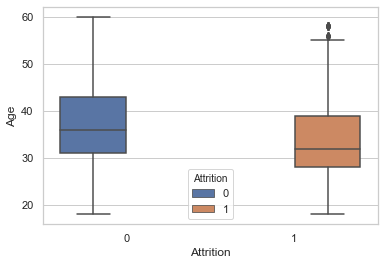

In [84]:
box('Age')

In [85]:
def Ages(row):
    if row['Age']<21:
        row['Ages']='18-20'
        return '18-20'
    elif ((row['Age']>20)&(row['Age']<26)):
        row['Ages']='21-25'
        return '21-25'
    elif ((row['Age']>25)&(row['Age']<31)):
        row['Ages']='26-30'
        return '26-30'
    elif ((row['Age']>30)&(row['Age']<36)):
        row['Ages']='31-35'
        return '31-35'
    elif ((row['Age']>35)&(row['Age']<41)):
        row['Ages']='36-40'
        return '36-40'
    elif ((row['Age']>40)&(row['Age']<46)):
        row['Ages']='41-45'
        return '41-45'
    elif ((row['Age']>45)&(row['Age']<51)):
        row['Ages']='46-50'
        return '46-50'
    elif ((row['Age']>50)&(row['Age']<56)):
        row['Ages']='51-55'
        return '51-55'
    elif ((row['Age']>55)&(row['Age']<61)):
        row['Ages']='56-60'
        return '56-60'
    elif ((row['Age']>60)):
        row['Ages']='60+'
        return '60+'
    else:
        row['Ages']='Silent'
        return 'Silent'
df['Ages']=''

In [86]:
df['Ages']=df.apply(Ages,axis=1)

In [87]:
df.head(2)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Ages
0,1,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,6,1,0,0,3.0,4.0,2.0,3,3,51-55
1,2,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,3,5,1,4,3.0,2.0,4.0,2,4,31-35


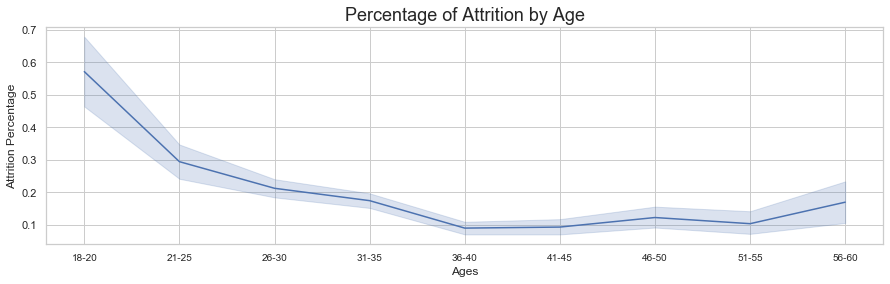

In [88]:
plt.figure(figsize=(15,4))
sns.lineplot(x = 'Ages', y = "Attrition", data=df)
plt.title('Percentage of Attrition by Age', fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel("Attrition Percentage")
plt.show()

In [89]:
dfmaker('Ages')

,No_Attrition,Attrition,Attrition %
18-20,36,48,57.142857
21-25,201,84,29.473684
26-30,621,168,21.292776
31-35,849,180,17.492711
36-40,753,75,9.057971
41-45,522,54,9.375000
46-50,342,48,12.307692
51-55,258,30,10.416667
56-60,117,24,17.021277


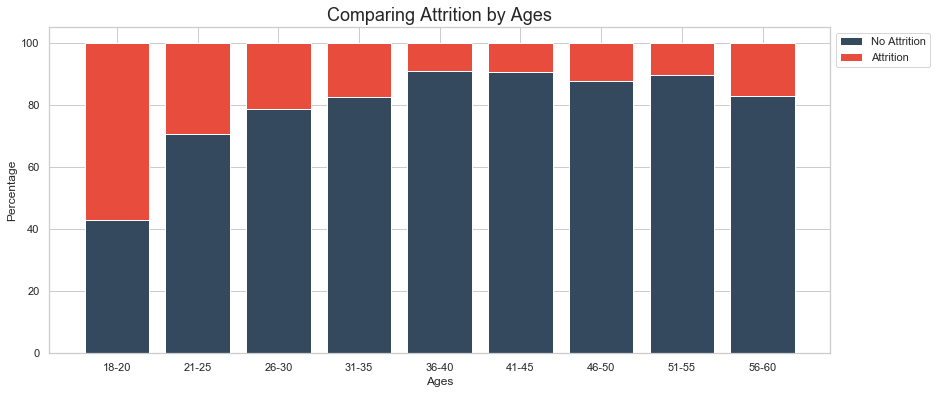

In [90]:
vmaker('Ages')

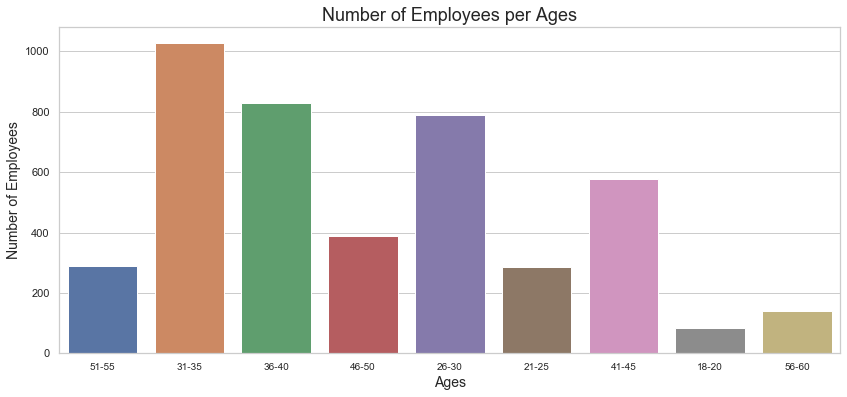

In [91]:
hmaker('Ages')

### Exploring Years With Current Manager

In [92]:
dfmaker('YearsWithCurrManager')

,No_Attrition,Attrition,Attrition %
0,534,255.0,32.319392
1,195,33.0,14.473684
2,882,150.0,14.534884
3,369,57.0,13.380282
4,261,33.0,11.224490
5,81,12.0,12.903226
6,75,12.0,13.793103
7,555,93.0,14.351852
8,291,30.0,9.345794
9,174,18.0,9.375000


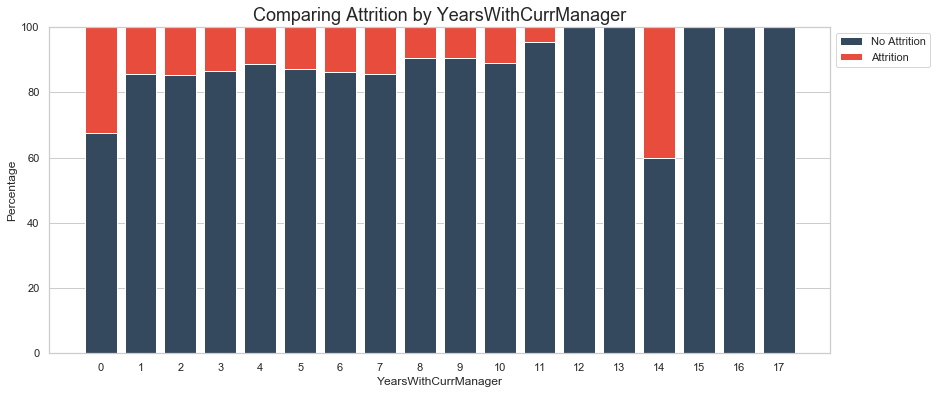

In [93]:
vmaker('YearsWithCurrManager')

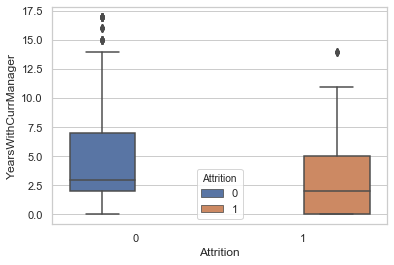

In [94]:
box('YearsWithCurrManager')

### Exploring Monthly Income

In Human Resources is common to think that attrition rate is higher on employees with low income. In this case is not true.

Taking a look on the outliers I decided to keep them because they represent high level positions and may be important to understand the company.

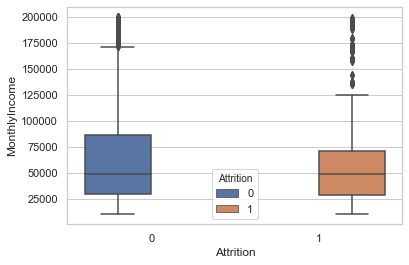

In [95]:
box('MonthlyIncome')

In [96]:
def Income(row):
    if row['MonthlyIncome']<25001:
        row['Income']='0-25000'
        return '0-25000'
    elif ((row['MonthlyIncome']>25000)&(row['MonthlyIncome']<50001)):
        row['Income']='25001-50000'
        return '25001-50000'
    elif ((row['MonthlyIncome']>50000)&(row['MonthlyIncome']<75001)):
        row['Income']='50001-75000'
        return '50001-75000'
    elif ((row['MonthlyIncome']>75000)&(row['MonthlyIncome']<100001)):
        row['Income']='75001-100000'
        return '75001-100000'
    elif ((row['MonthlyIncome']>100000)&(row['MonthlyIncome']<125001)):
        row['Income']='100001-125000'
        return '100001-125000'
    elif ((row['MonthlyIncome']>125000)&(row['MonthlyIncome']<150001)):
        row['Income']='125001-150000'
        return '125001-150000'
    elif ((row['MonthlyIncome']>150000)&(row['MonthlyIncome']<175001)):
        row['Income']='150001-175000'
        return '150001-175000'
    elif ((row['MonthlyIncome']>175000)&(row['MonthlyIncome']<200001)):
        row['Income']='175001-200000'
        return '175001-200000'
    elif ((row['MonthlyIncome']>200000)):
        row['Income']='200000+'
        return '200000+'
    else:
        row['Income']='Silent'
        return 'Silent'
df['Income']=''

In [97]:
df['Income']=df.apply(Income,axis=1)

In [98]:
df.head(2)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Ages,Income
0,1,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1,0,0,3.0,4.0,2.0,3,3,51-55,125001-150000
1,2,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,5,1,4,3.0,2.0,4.0,2,4,31-35,25001-50000


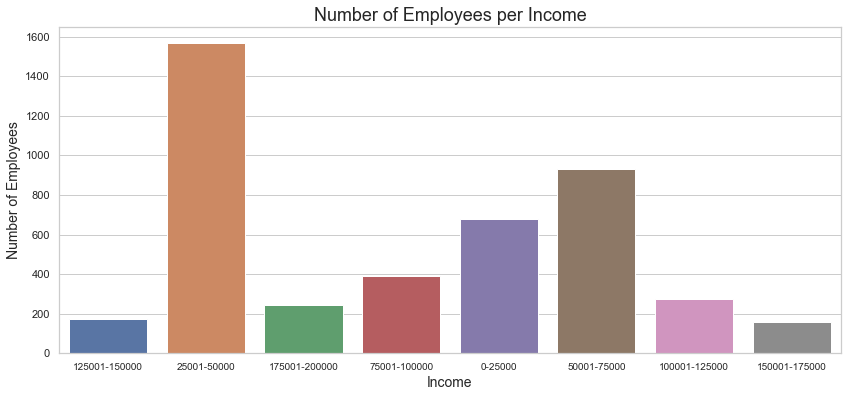

In [99]:
hmaker('Income')

In [100]:
dfmaker('Income')

,No_Attrition,Attrition,Attrition %
0-25000,573,105,15.486726
100001-125000,234,39,14.285714
125001-150000,153,18,10.526316
150001-175000,126,30,19.230769
175001-200000,213,30,12.345679
25001-50000,1299,270,17.208413
50001-75000,765,165,17.741935
75001-100000,336,54,13.846154


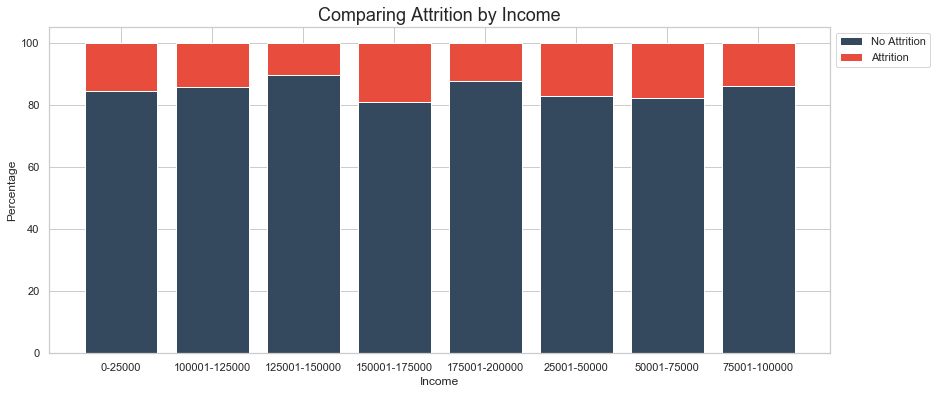

In [101]:
vmaker('Income')

## Exploring with categorical variables

### Exploring Business Travel category

In [102]:
dfmaker('BusinessTravel')

,No_Attrition,Attrition,Attrition %
Non-Travel,414,36,8.000000
Travel_Frequently,624,207,24.909747
Travel_Rarely,2661,468,14.956855


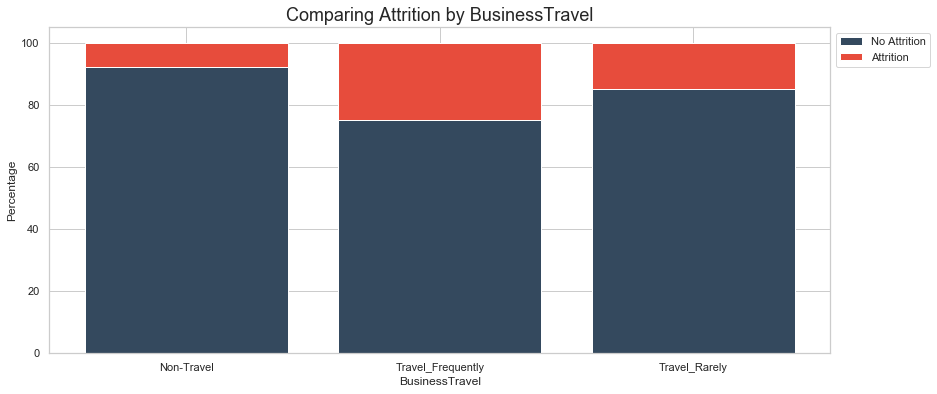

In [103]:
vmaker('BusinessTravel')

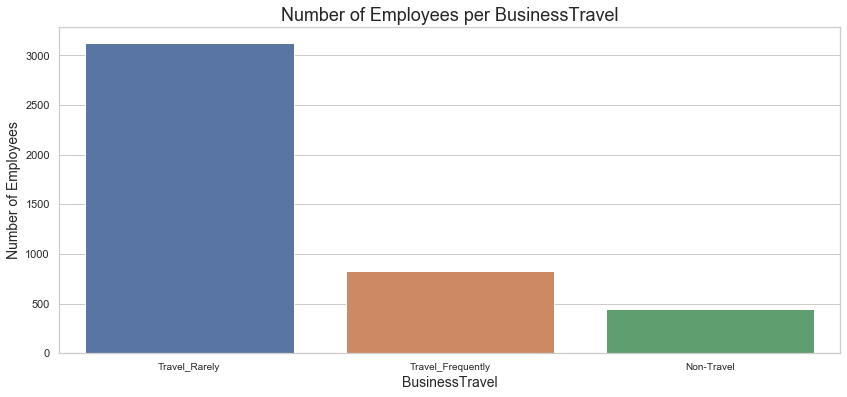

In [104]:
hmaker('BusinessTravel')

### Exploring Department

Research and Development is the department with a higher number of employees so each percentage point has a major impact compared to the other departments.

In [105]:
dfmaker('Department')

,No_Attrition,Attrition,Attrition %
Human Resources,132,57,30.158730
Research & Development,2430,453,15.712799
Sales,1137,201,15.022422


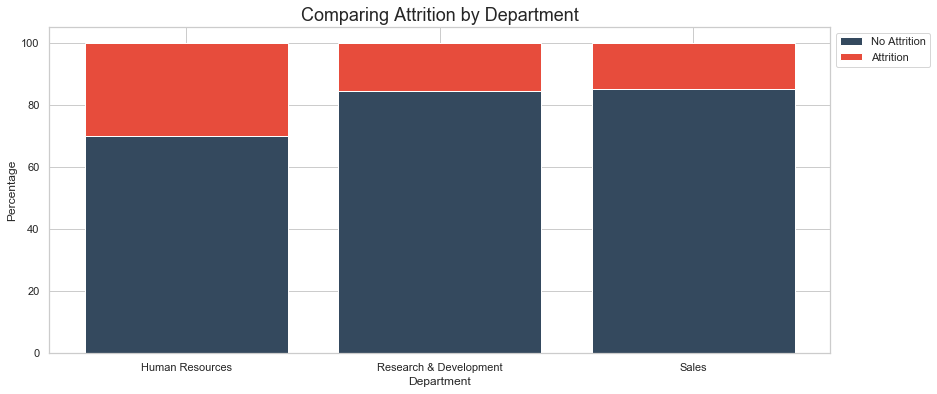

In [106]:
vmaker('Department')

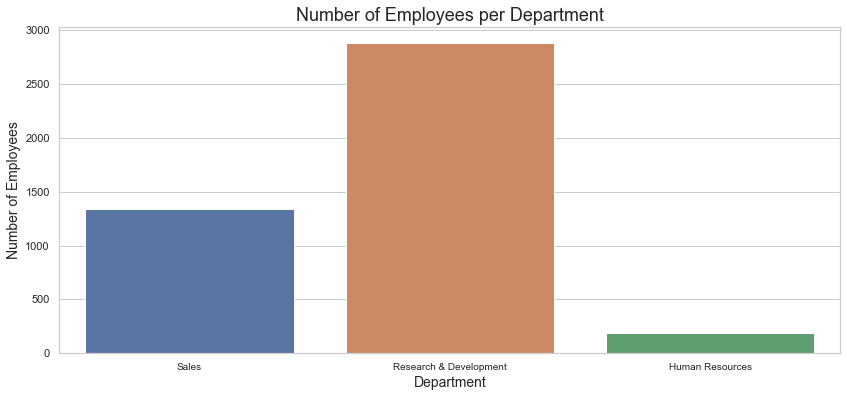

In [107]:
hmaker('Department')

### Exploring Education Field

In [108]:
dfmaker('EducationField')

,No_Attrition,Attrition,Attrition %
Human Resources,48,33,40.740741
Life Sciences,1515,303,16.666667
Marketing,402,75,15.723270
Medical,1167,225,16.163793
Other,216,30,12.195122
Technical Degree,351,45,11.363636


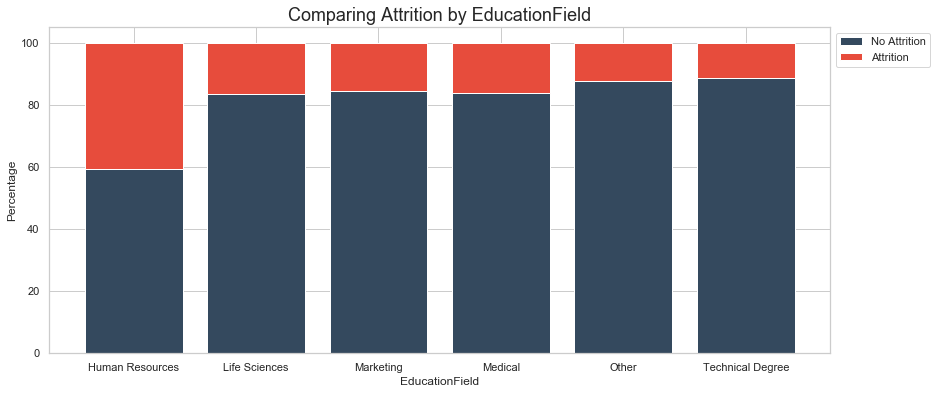

In [109]:
vmaker('EducationField')

### Exploring Gender

In [110]:
dfmaker('Gender')

,No_Attrition,Attrition,Attrition %
Female,1494,270,15.306122
Male,2205,441,16.666667


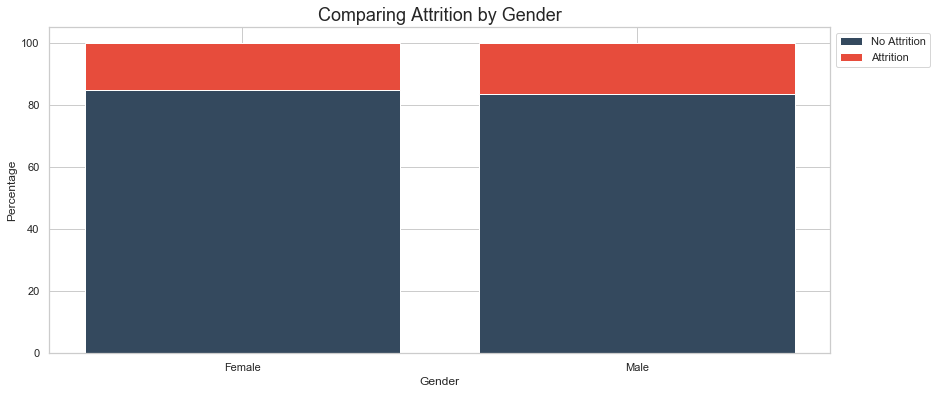

In [111]:
vmaker('Gender')

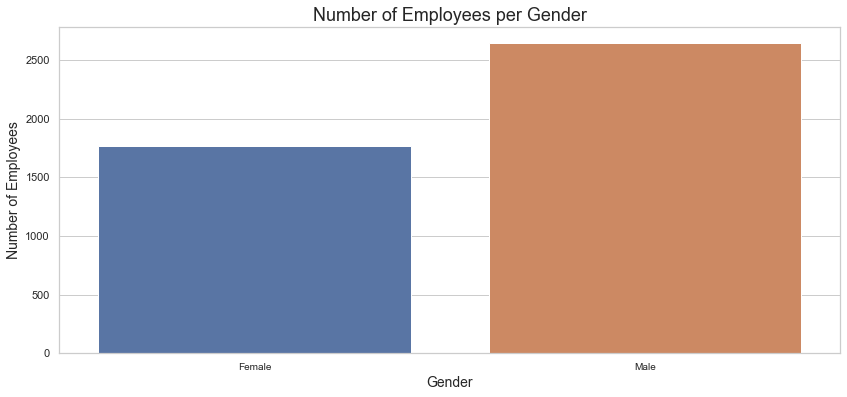

In [112]:
hmaker('Gender')

### Exploring Job Role

In [113]:
dfmaker('JobRole')

,No_Attrition,Attrition,Attrition %
Healthcare Representative,336,57,14.503817
Human Resources,135,21,13.461538
Laboratory Technician,651,126,16.216216
Manager,264,42,13.725490
Manufacturing Director,387,48,11.034483
Research Director,183,57,23.750000
Research Scientist,717,159,18.150685
Sales Executive,813,165,16.871166
Sales Representative,213,36,14.457831


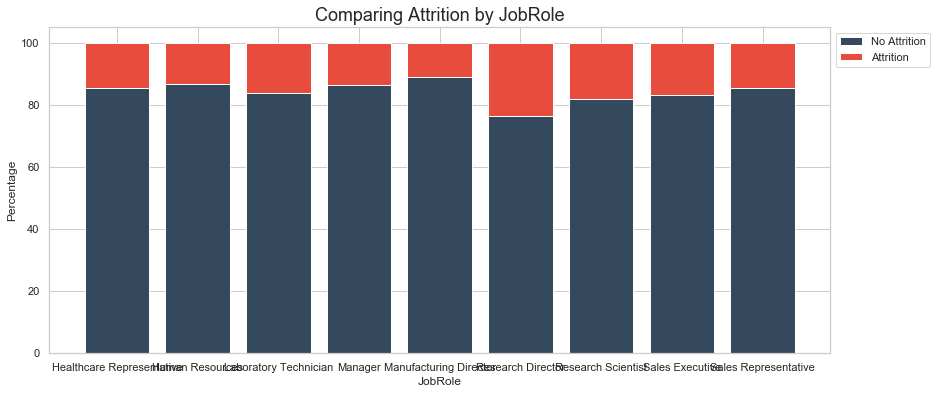

In [114]:
vmaker('JobRole')

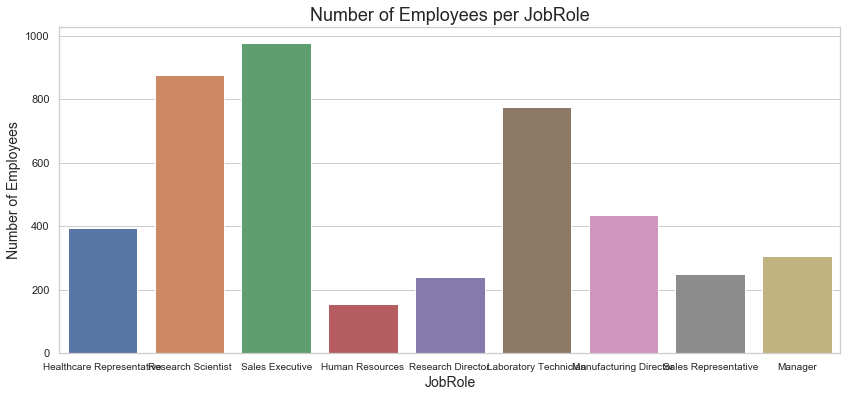

In [115]:
hmaker('JobRole')

### Exploring Marital Status

Attrition is clearly higher for single employees.

In [116]:
dfmaker('MaritalStatus')

,No_Attrition,Attrition,Attrition %
Divorced,882,99,10.091743
Married,1767,252,12.481426
Single,1050,360,25.531915


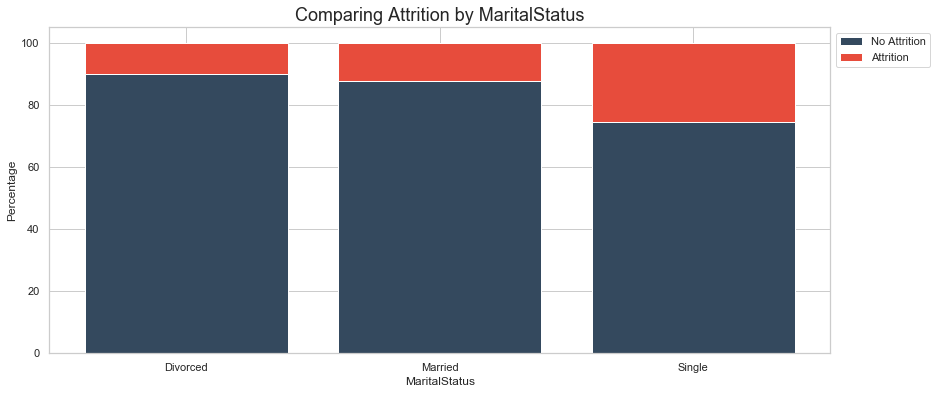

In [117]:
vmaker('MaritalStatus')

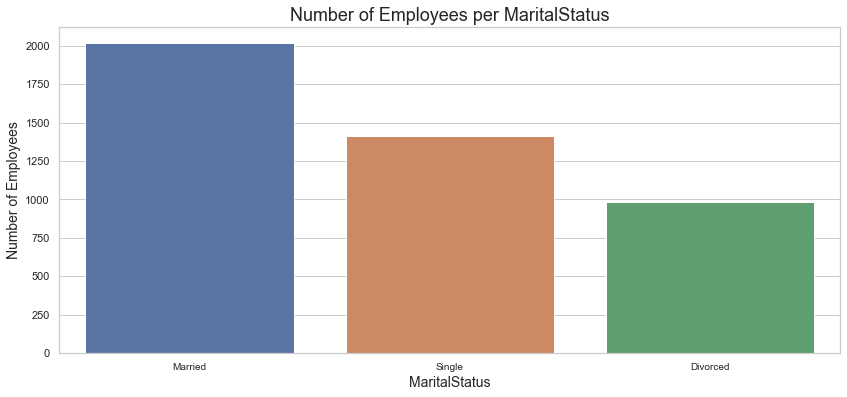

In [118]:
hmaker('MaritalStatus')

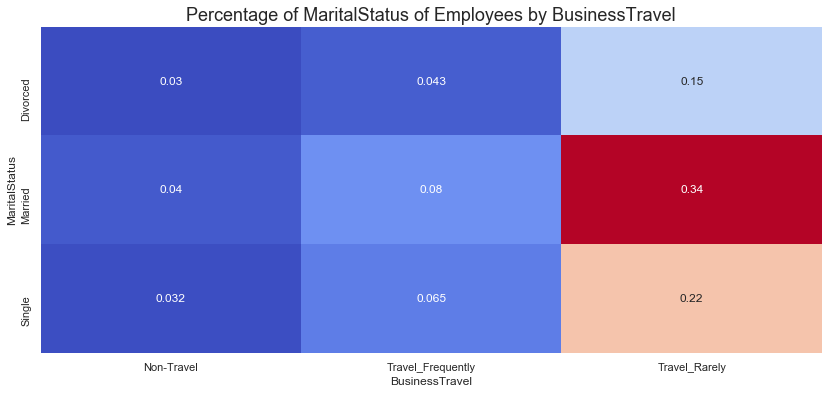

In [119]:
crossmaker('MaritalStatus', 'BusinessTravel')

### Dropping

In this seccion I am dropping some variables that are not important to our model. I could realize this comparing the difference of percentage of attrition between values. If the difference is not significant we can assume that the variable won't affect our model.


In [120]:
df.drop(['EmployeeCount', 'StandardHours', 'PerformanceRating', 'StockOptionLevel', 'Ages','Income','Over18', 'DistanceFromHome'], axis=1, inplace=True)

### Getting Dummy Variables on Categorical

In [121]:
dummy1 = pd.get_dummies(df[['BusinessTravel', 'Department', 'EducationField', 'Gender',
                            'JobRole', 'MaritalStatus']], drop_first=True)
df1 = pd.concat([df, dummy1], axis=1)

In [122]:
df1 = df1.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                'JobRole', 'MaritalStatus'], 1)

(37.0, 0.0)

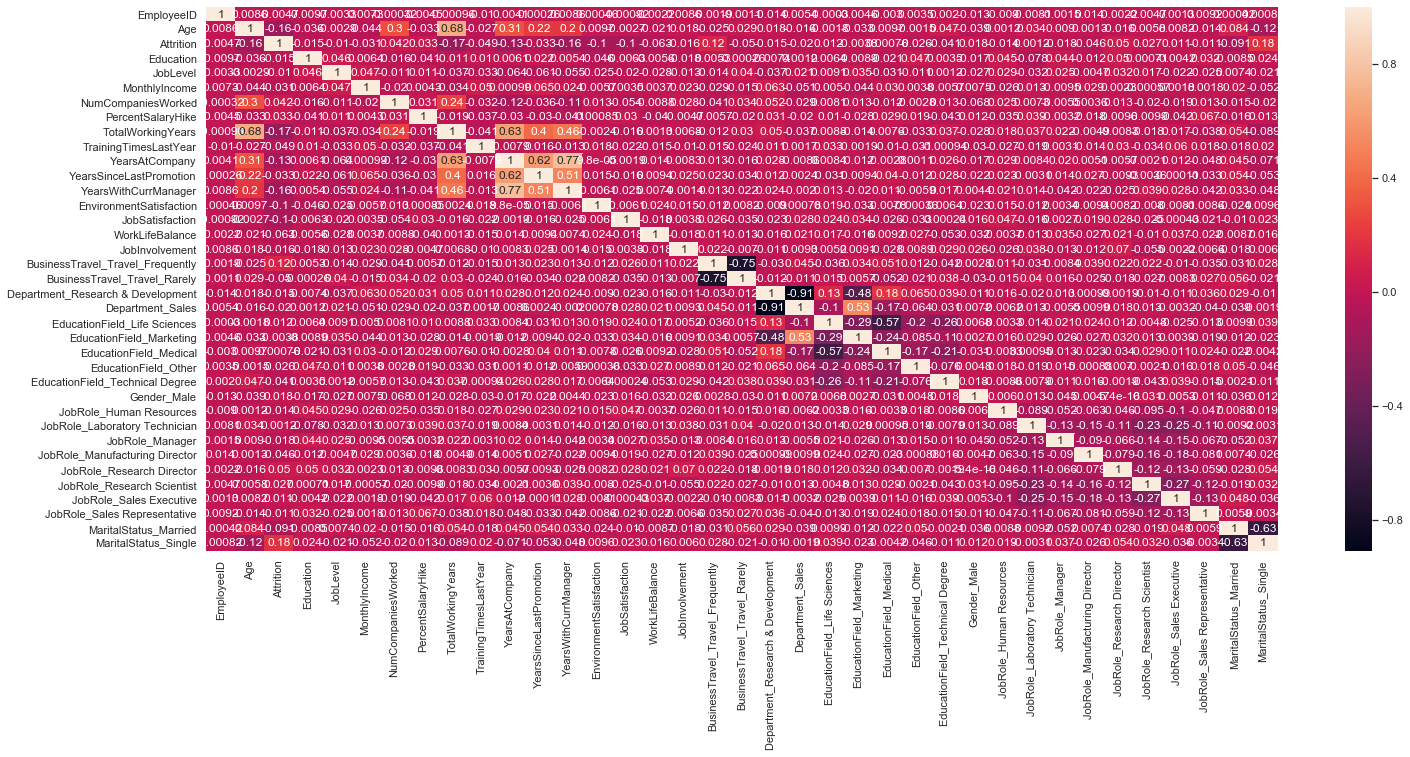

In [123]:
plt.figure(figsize=(24,10))
ax = sns.heatmap(df1.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

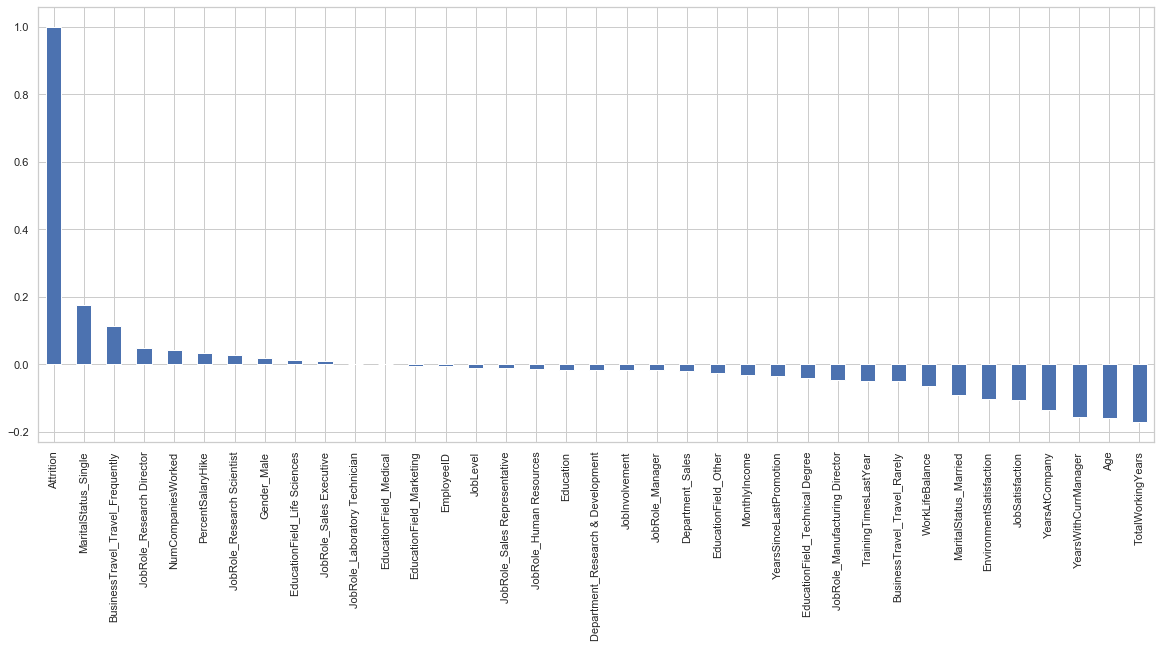

In [124]:
plt.figure(figsize=(20,8))
df1.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar');

# Modeling Data

For modeling I am using 4 different algorithms:

1) Logistic Regression

2) Random Fores Classifier

3) Decision Trees

4) Adaboost

Before modeling we need to separate our target variable in a different dataset.

In [125]:
y = df1['Attrition']
X = df1.drop(['Attrition'], axis=1)

In [126]:
X.head(2)

,EmployeeID,Age,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,51,2,1,131160,1.0,11,1.0,6,1,...,0,0,0,0,0,0,0,0,1,0
1,2,31,1,1,41890,0.0,23,6.0,3,5,...,0,0,0,0,0,1,0,0,0,1


In [127]:
y.head(2)

0    0
1    1
Name: Attrition, dtype: int64

### Feature scaling - Data normalization

In [128]:
scaler=MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [129]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3528, 36)
(3528,)
(882, 36)
(882,)


### Logistic Regression

In [130]:
logit  = LogisticRegression(random_state=42, fit_intercept = True, solver='liblinear')
model_log = logit.fit(X_train, y_train)
log_pred = model_log.predict(X_train)
log_pred_test = model_log.predict(X_test)

In [131]:
model_log.score(X_test,y_test)

0.8424036281179138

In [132]:
logscore = model_log.score(X_test,y_test)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       741
           1       0.52      0.16      0.25       141

    accuracy                           0.84       882
   macro avg       0.69      0.57      0.58       882
weighted avg       0.81      0.84      0.81       882



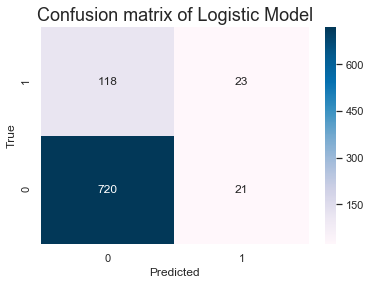

In [133]:
print(classification_report(y_test,log_pred_test))
lr_matrix = confusion_matrix(y_test, log_pred_test)
f,ax=plt.subplots()
sns.heatmap(lr_matrix, annot=True, fmt='d', cmap='PuBu',ax=ax)
ax.set_ylim([0,2])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion matrix of Logistic Model", fontsize=18)
plt.show()

AUC: 0.7321618284664196


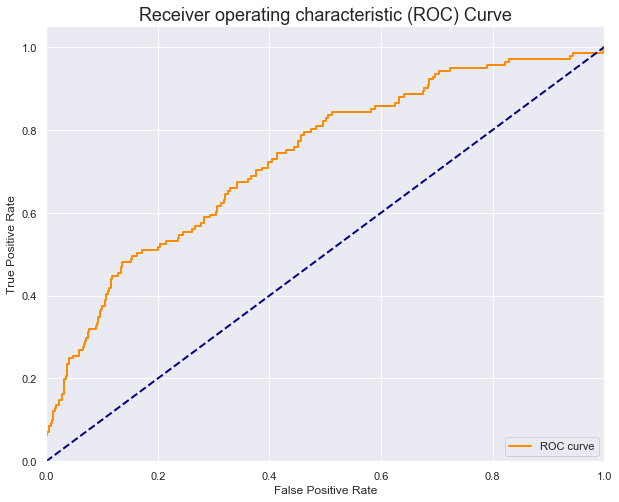

In [134]:
y_score = logit.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

sns.set_style('darkgrid')

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver operating characteristic (ROC) Curve', fontsize=18)
plt.legend(loc='lower right')
plt.show()

### Random Forest Classifier

In [135]:
y = df1['Attrition']
X = df1.drop(['Attrition'], axis=1)

In [136]:
X.head(2)

,EmployeeID,Age,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,51,2,1,131160,1.0,11,1.0,6,1,...,0,0,0,0,0,0,0,0,1,0
1,2,31,1,1,41890,0.0,23,6.0,3,5,...,0,0,0,0,0,1,0,0,0,1


In [137]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3528, 36)
(3528,)
(882, 36)
(882,)


In [138]:
rfc =RandomForestClassifier(n_estimators=100, max_depth=10)
model_rfc = rfc.fit(X_train, y_train)
rfc_pred = model_rfc.predict(X_test)
rfc_pred_train = model_rfc.predict(X_train)

In [139]:
model_rfc.score(X_test, y_test)

0.9285714285714286

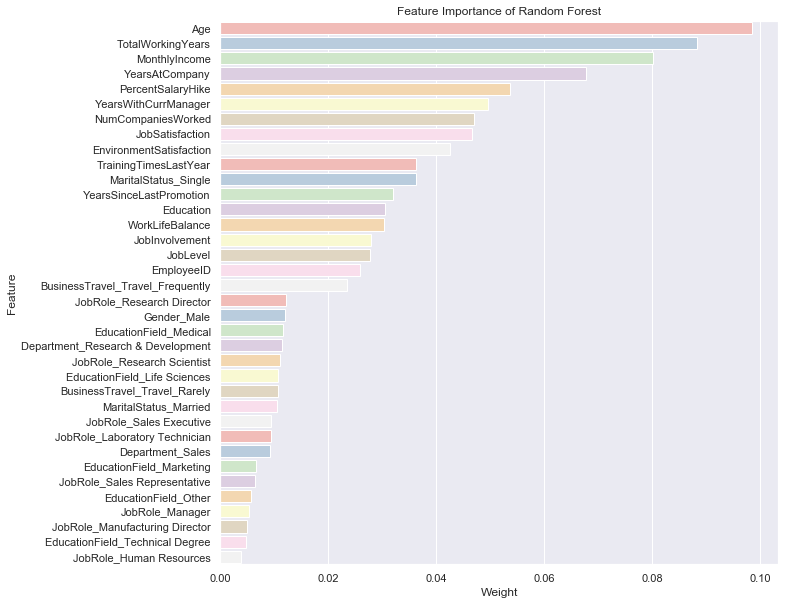

In [140]:
RF_feat_im = pd.DataFrame(rfc.feature_importances_)
RF_feat_im["Feature"] = list(X) 
RF_feat_im.sort_values(by=0, ascending=False).head()
plt.figure(figsize=(10,10))
g = sns.barplot(0,"Feature",data = RF_feat_im.sort_values(by=0, ascending=False), palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Feature Importance of Random Forest")

Classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       741
           1       1.00      0.55      0.71       141

    accuracy                           0.93       882
   macro avg       0.96      0.78      0.84       882
weighted avg       0.93      0.93      0.92       882



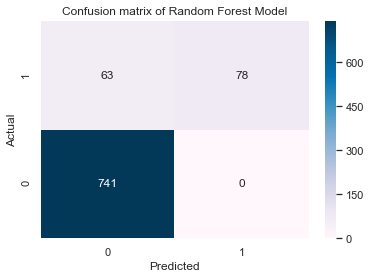

In [141]:
print("Classification report:\n", classification_report(y_test, rfc_pred))
cf_matrix = confusion_matrix(y_test, rfc_pred)
f,ax=plt.subplots()
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='PuBu',ax=ax)
ax.set_ylim([0,2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion matrix of Random Forest Model")
plt.show()

AUC: 0.7765957446808511


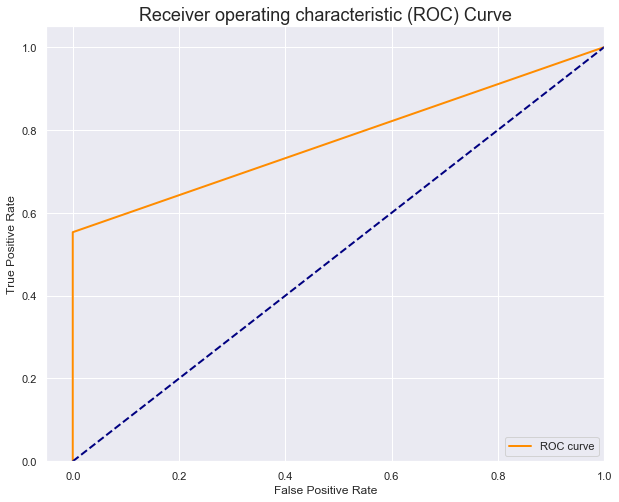

In [142]:
y_score = rfc.fit(X_train, y_train)
fpr2, tpr2, thresholds = roc_curve(y_test, rfc_pred)

sns.set_style('darkgrid')

print('AUC: {}'.format(auc(fpr2, tpr2)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlim([-.05, 1.0])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver operating characteristic (ROC) Curve', fontsize=18)
plt.legend(loc='lower right')
plt.show()

### Decision Tree Classifier

In [143]:
dt = DecisionTreeClassifier(random_state=42, max_depth = 5)  
model_dt = dt.fit(X_train, y_train)
dt_pred = model_dt.predict(X_test)
dt_pred_train = model_dt.predict(X_train)

In [144]:
model_dt.score(X_test,y_test)

0.8560090702947846

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       741
           1       0.68      0.19      0.30       141

    accuracy                           0.86       882
   macro avg       0.77      0.59      0.61       882
weighted avg       0.83      0.86      0.82       882



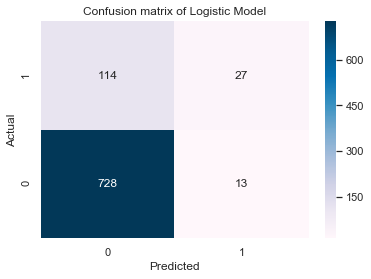

In [145]:
print(classification_report(y_test,dt_pred))
dt_matrix = confusion_matrix(y_test, dt_pred)
f,ax=plt.subplots()
sns.heatmap(dt_matrix, annot=True, fmt='d', cmap='PuBu',ax=ax)
ax.set_ylim([0,2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion matrix of Logistic Model")
plt.show()

AUC: 0.5869727510265024


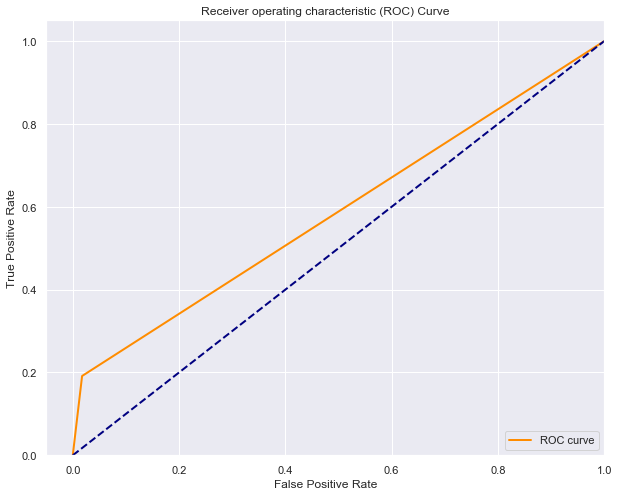

In [146]:
y_score = dt.fit(X_train, y_train)
fpr3, tpr3, thresholds = roc_curve(y_test, dt_pred)

sns.set_style('darkgrid')

print('AUC: {}'.format(auc(fpr3, tpr3)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr3, tpr3, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.ylim([0.0, 1.05])
plt.xlim([-.05, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Adaboost

In [147]:
adaboost = AdaBoostClassifier(random_state=42)
model_ada = adaboost.fit(X_train, y_train)
ada_pred = model_ada.predict(X_test)

In [148]:
model_ada.score(X_test,y_test)

0.844671201814059

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       741
           1       0.54      0.21      0.30       141

    accuracy                           0.84       882
   macro avg       0.70      0.59      0.61       882
weighted avg       0.81      0.84      0.81       882



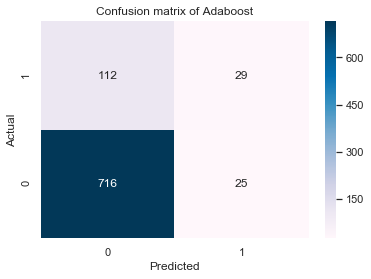

In [149]:
print(classification_report(y_test,ada_pred))
ada_matrix = confusion_matrix(y_test, ada_pred)
f,ax=plt.subplots()
sns.heatmap(ada_matrix, annot=True, fmt='d', cmap='PuBu',ax=ax)
ax.set_ylim([0,2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion matrix of Adaboost")
plt.show()

AUC: 0.5859677836161599


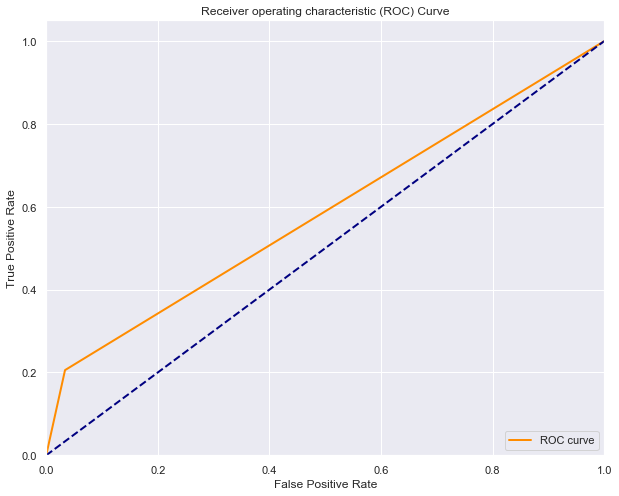

In [150]:
y_score = adaboost.fit(X_train, y_train)
fpr4, tpr4, thresholds = roc_curve(y_test, ada_pred)

sns.set_style('darkgrid')

print('AUC: {}'.format(auc(fpr4, tpr4)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr4, tpr4, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Results

This is the most important step of modeling: Choose your model.

Looking at the results I should select Random Forest Classifier for its 93% accuracy, but I am more interested in how this model could impact on medium - long term. This is not just about who is prone to leave, to me, this is more about how the company should pay more attention on hiring and retainment staff. That is the reason why I am choosing Logistic Regression as the best model for this case. Logistic regression gives me a higher number of false positives, which means that the company will have a bigger number of employees to look closer.

In [151]:
print('Logistic Regression Score : ', logscore)
print('Random Forest Score : ', model_rfc.score(X_test, y_test))
print('Decision Trees Score : ', model_dt.score(X_test,y_test))
print('Adaboost Score : ', model_ada.score(X_test,y_test))

Logistic Regression Score :  0.8424036281179138
Random Forest Score :  0.9240362811791383
Decision Trees Score :  0.8560090702947846
Adaboost Score :  0.844671201814059


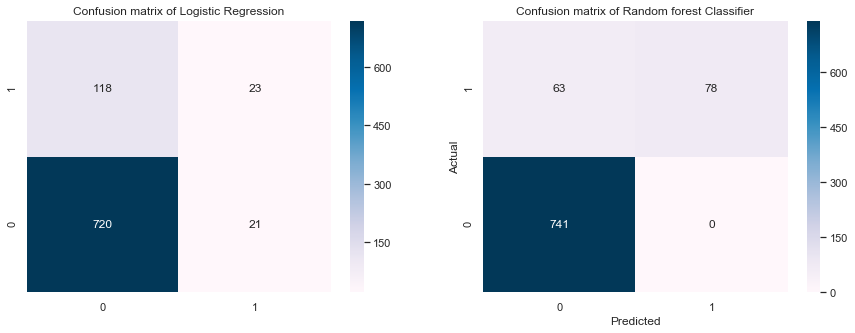

In [152]:
cf_matrix_lr = confusion_matrix(y_test, log_pred_test)
cf_matrix_rfc = confusion_matrix(y_test, rfc_pred)
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.heatmap(cf_matrix_lr, annot=True, fmt='d', cmap='PuBu',ax=ax[0])
ax[0].set_ylim([0,2])
ax[0].set_title("Confusion matrix of Logistic Regression")
sns.heatmap(cf_matrix_rfc, annot=True, fmt='d', cmap='PuBu',ax=ax[1])
ax[1].set_ylim([0,2])
ax[1].set_title("Confusion matrix of Random forest Classifier")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

### Results

This is the most important step of modeling: Choose your model.

Looking at the results I am selecting Random Forest Classifier for its 93% accuracy, but I am also interested in how this model could impact on medium - long term. This is not just about who is prone to leave. To me, this is more about how the company should pay more attention on hiring and retainment staff. That is the reason why I am choosing Random Forest Classifier as the best model for this case. The model predicts the higher number of true positives compared with the other models. It also predicts that 65 are going to leave the company but they are actually not. This is called a False Positive and in this case, for this company, means that those employees could have a high risk to leave, it is like a yellow flag to track them. Here I ask myself: Can the Human Resources department handle or support other departments with this? They have the highest percentage of attrition, and it seems that HR employees are not happy working there, I mean, HR have serious problems to solve first.

- Employees with less worked years thave more probabilities to leave the company than employees with more years worked.
- 57% of employees from 18 to 20 years old leaved the company last year. 29% of employees from 21 to 25 years old leaved the company las year
- Human Resources department has problems, we can not figure it out what is exactly happening and there is not enough evidence to determine the real impact of this issue. Are they hiring under the right profile? Are they hiring on time? Do they support enough to other departments?
- The company has a problem retaining talent, we can see more turnover on 4 rated employees in Job Involvement than those who got 1. We can also see that the highest percentage of turnover is in those employees who had the highest salary increasing. This has no sense, why are they increasing 25% their salary and leaving the company? 
- Those employees with 1 year with their current manager tend to leave more than those with more. This is particularly interesting assuming that 14% (42) of the managers leaved the company last year
- Single employees are 26% prone to leave the company.

### Future Work

- Are the employees leaving the company or getting fired? Does the company save the employee's resignation reasons?

- Determine the cost of internal/external trainings and why some employees have 1 and others 6.

- When an employee leaves, the company needs to know why. If is going to a better position we can assume that we are losing talent.

- Is the salary increasing the only incentive that the company offers to employees to stay?

- It would be great to have some business results.